<ul style="list-style-type:none; text-align: center;">
    <li style="font-family:'Times New Roman';font-weight: bold;font-size:40px;color:#2b31ab">Predictive Modeling Project</li>
</ul>

<li style="font-family:'Times New Roman';font-weight: bold;font-size:30px;color:#2b31ab"">Problem: 1 </li>

<li style="font-family:'Times New Roman';font-weight: bold;font-size:25px;color:#2b31ab""> Linear Regression  </li>

### Problem Statement:

You are hired by a company named Gem Stones Co Ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of approximately 27,000 pieces of cubic zirconia (which is an inexpensive synthesized diamond alternative with similar qualities of a diamond).

Your objective is to accurately predict prices of the zircon pieces. Since the company profits at a different rate at different price levels, for revenue management, it is important that prices are predicted as accurately as possible. At the same time, it is important to understand which of the predictors are more important in determining the price.

#### Data Dictionary for Cubic zarconia Manufacture:

* Carat   : Carat weight of the cubic zirconia.
* Cut     : Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
* Colour  : Colour of the cubic zirconia. D being the best and J the worst.
* Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
* Depth   : The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
* Table   : The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
* Price   : the Price of the cubic zirconia.
* X	      : Length of the cubic zirconia in mm.
* Y       : Width of the cubic zirconia in mm.
* Z	      : Height of the cubic zirconia in mm.

#### 1.1 The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have a symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. Since this is a regression problem, the dependence of the response on the predictors needs to be thoroughly investigated.

#### 1.2 Build various iterations of the Linear Regression model using appropriate variable selection techniques for the full data.Use Full Data to develop a model to identify significant predictors. Check whether the proposed model is free of multicollinearity. Apply variable selection method as required. Show all intermediate models leading to the final model. Justify your choice of the final model. Which are the significant predictors?

#### 1.3 Split the data into training (70%) and test (30%). Build the various iterations of the Linear Regression models on the training data and use those models to predict on the test data using appropriate model evaluation metrics.If prediction accuracy of the price is the only objective, then you may want to divide the data into a training and a test set, chosen randomly, and use the training set to develop a model and test set to validate your model. Use the models developed in Part (II) to compare accuracy in training and test sets. Compare the final model of Part (II) and the proposed one in Part (III). Which model provides the most accurate prediction? If the model found in Part (II) is different from the proposed model in Part (III), give an explanation.

### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as SM
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from warnings import filterwarnings
filterwarnings("ignore")


In [2]:
plt.rcParams['font.size']=16
# plt.rcParams['axes.grid']=True
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 100)

### Loading the data set

In [3]:
df=pd.read_csv('cubic_zirconia.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.shape

(26967, 11)

### Basic Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
# unnamed 0 serial number and not significant column here so we can drop it
df=df.drop('Unnamed: 0',axis=1)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [10]:
# to check the catagorical feature and its unique sub catagory
for i in df.columns: 
    if df[i].dtype == 'object': 
        print('\n')
        print('feature:',i)
        print(pd.Categorical(df[i].unique()))
    



feature: cut
['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']


feature: color
['E', 'G', 'F', 'D', 'H', 'J', 'I']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']


feature: clarity
['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1']
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']


In [11]:
#Checking for missing Values
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

* There is missing values in the depth feature.
* we can impute the missing values for this feature with median. also data seems to be normally distrubuted as mean and medean almost equal and dont have marginal differance for this feature.

In [12]:
# replacing null with median 
df.depth.fillna(df.depth.median(),inplace=True)

In [13]:
# conforming the missing value imputation
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [14]:
df.shape

(26967, 10)

In [15]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [16]:
# Descriptive stat summary for all variable
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26967.0,NaN,NaN,NaN,61.746564,1.394509,50.8,61.1,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


In [17]:
# Descriptive stat summary for catagorical variable
df.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [18]:
df[(df.x<=0)|(df.y<=0)|(df.z<=0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [19]:
# #Dropping dimentionless diamonds
df=df.drop(df[(df.x<=0)|(df.y<=0)|(df.z<=0)].index)

In [20]:
df.shape

(26958, 10)

In [21]:
#Checking for ducplicate Value
dup = df.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 33


In [22]:
#we can drop the duplicate entries her as duplicate entries shows identical pieces
df.drop_duplicates(inplace=True)

In [23]:
dup = df.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


In [24]:
df.shape

(26925, 10)

In [25]:
#after duplicate removal and dropping diamensionless diamond
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,0.797821,0.477085,0.20,0.40,0.70,1.05,4.50
depth,26925.0,61.746982,1.393457,50.80,61.10,61.80,62.50,73.60
table,26925.0,57.455305,2.231327,49.00,56.00,57.00,59.00,79.00
x,26925.0,5.729385,1.126081,3.73,4.71,5.69,6.55,10.23
y,26925.0,5.733152,1.163820,3.71,4.71,5.70,6.54,58.90
z,26925.0,3.538820,0.717483,1.07,2.90,3.52,4.04,31.80
price,26925.0,3936.249991,4020.983187,326.00,945.00,2373.00,5353.00,18818.00


In [27]:
table = pd.concat([df.skew(), df.kurtosis()], axis=1, join="inner")
table=table.rename(columns={0:'Skewness',1:'kurtosis'})
table

,Skewness,kurtosis
carat,1.114871,1.212235
depth,-0.028403,3.863895
table,0.764890,1.579418
x,0.402010,-0.720965
y,3.888607,160.727513
z,2.639529,88.516471
price,1.619055,2.152993


### Univariate Analysis

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,0.797821,0.477085,0.20,0.40,0.70,1.05,4.50
depth,26925.0,61.746982,1.393457,50.80,61.10,61.80,62.50,73.60
table,26925.0,57.455305,2.231327,49.00,56.00,57.00,59.00,79.00
x,26925.0,5.729385,1.126081,3.73,4.71,5.69,6.55,10.23
y,26925.0,5.733152,1.163820,3.71,4.71,5.70,6.54,58.90
z,26925.0,3.538820,0.717483,1.07,2.90,3.52,4.04,31.80
price,26925.0,3936.249991,4020.983187,326.00,945.00,2373.00,5353.00,18818.00


In [29]:
def univariate_analysis1(column,nbins):
    print("Distribution of " + column)
    print('------------------------------------------------')
    sns.set_style("darkgrid")
    sns.histplot(df[column], kde=True,palette='colorblind');
    plt.show()
    
    print("BoxPlot of " + column)
    print('------------------------------------------------')
    ax = sns.boxplot(x=df[column],color='y')
    plt.show()
    

In [30]:
df_num=df.select_dtypes(include=('float64','int64'))

In [31]:
numeric_columns = list(df_num.columns.values)

Distribution of carat
------------------------------------------------


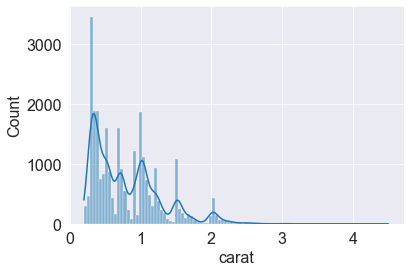

BoxPlot of carat
------------------------------------------------


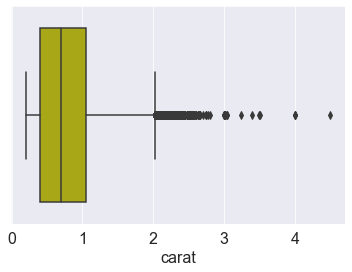

Distribution of depth
------------------------------------------------


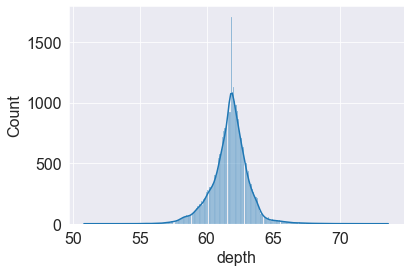

BoxPlot of depth
------------------------------------------------


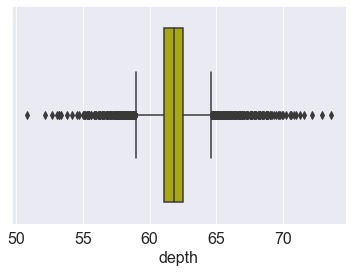

Distribution of table
------------------------------------------------


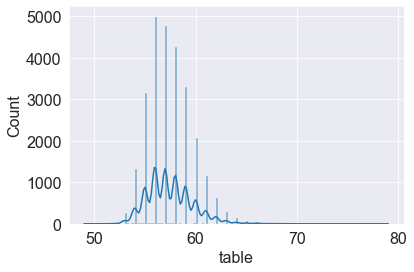

BoxPlot of table
------------------------------------------------


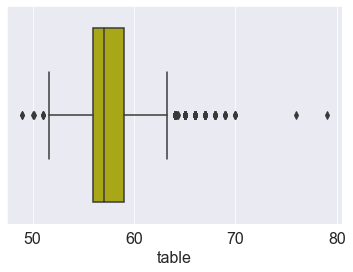

Distribution of x
------------------------------------------------


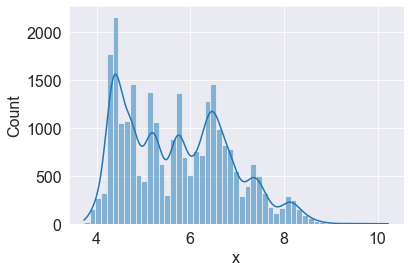

BoxPlot of x
------------------------------------------------


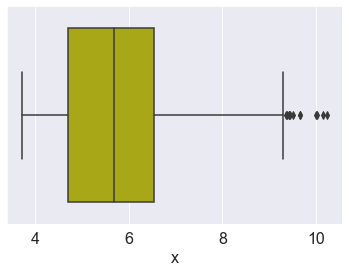

Distribution of y
------------------------------------------------


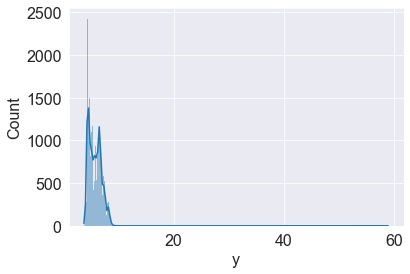

BoxPlot of y
------------------------------------------------


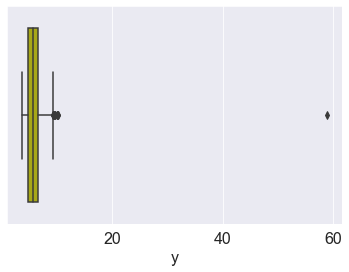

Distribution of z
------------------------------------------------


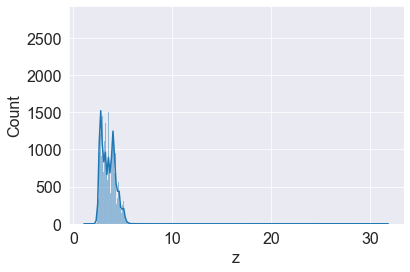

BoxPlot of z
------------------------------------------------


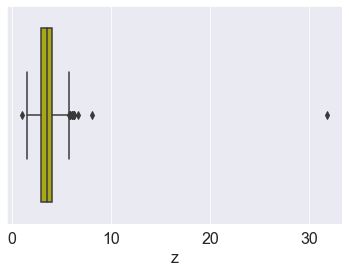

Distribution of price
------------------------------------------------


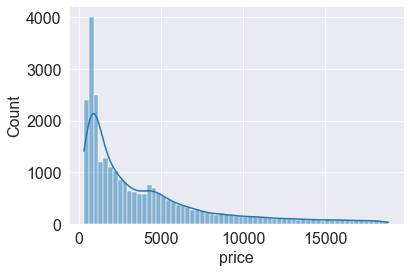

BoxPlot of price
------------------------------------------------


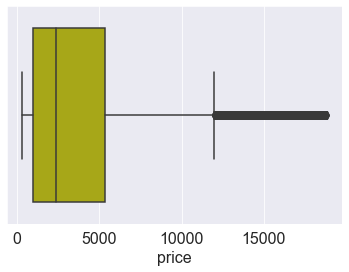

In [32]:
for x in numeric_columns:
    univariate_analysis1(x,10)

In [33]:
## Categorical Variable

In [34]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [35]:
df.cut.value_counts()

Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64

In [36]:
df.color.value_counts()

G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [37]:
df.clarity.value_counts()

SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64

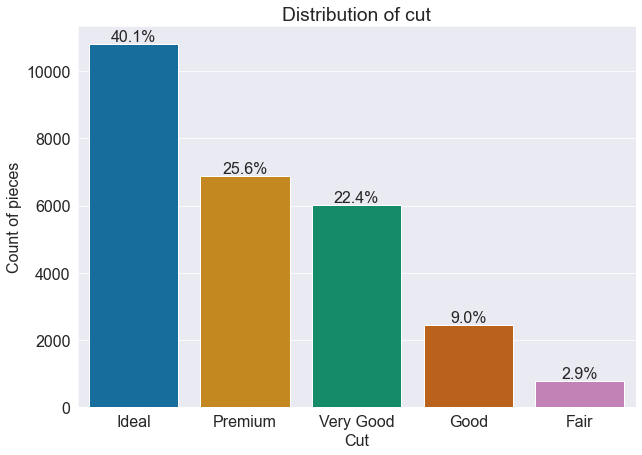

In [38]:
# Analyze the clarity variable Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
ax = sns.countplot(x='cut', data=df, palette='colorblind')
plt.title('Distribution of cut')
plt.xlabel('Cut')
plt.ylabel('Count of pieces')

ncount = len(df.cut)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

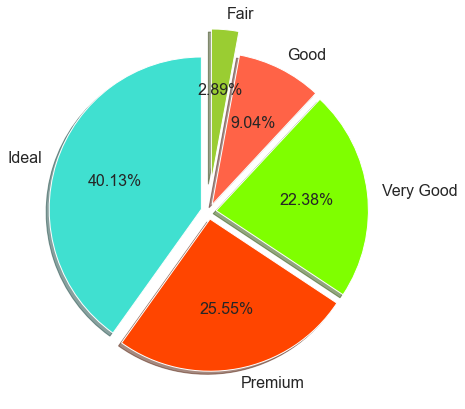

In [39]:
plt.figure(figsize=(10,7))
plt.pie(df['cut'].value_counts().values,
        labels=df['cut'].value_counts().index,
        startangle=90,
        colors=['turquoise', 'orangered', 'chartreuse','tomato', 'yellowgreen'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%');

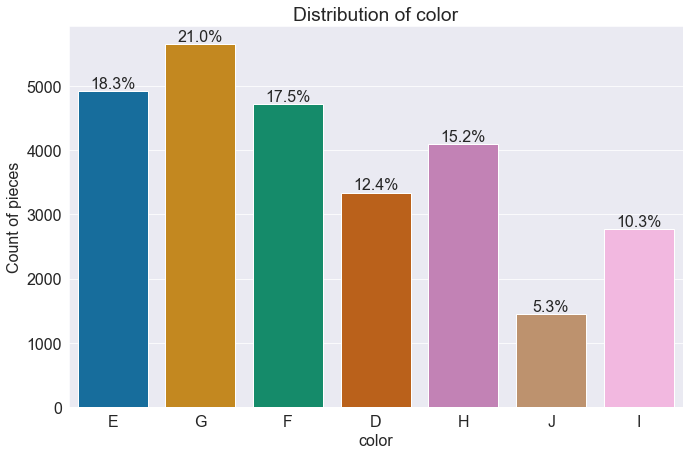

In [40]:
# Analyze the color variable D being the best and J the worst.

plt.figure(figsize=(11,7))
sns.set_style('darkgrid')
ax = sns.countplot(x='color', data=df, palette='colorblind')
plt.title('Distribution of color')
plt.xlabel('color')
plt.ylabel('Count of pieces')

ncount = len(df.cut)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

In [41]:
# plt.figure(figsize=(15,10))
# plt.pie(df['clarity'].value_counts().values,
#         labels=df['clarity'].value_counts().index,
#         startangle=90,
#         colors=['orange', 'lightgreen', 'red', 'lightblue', 'pink','yellowgreen', 'gold','turquoise'],
#         explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.2],
#         shadow=True, autopct='%1.2f%%');

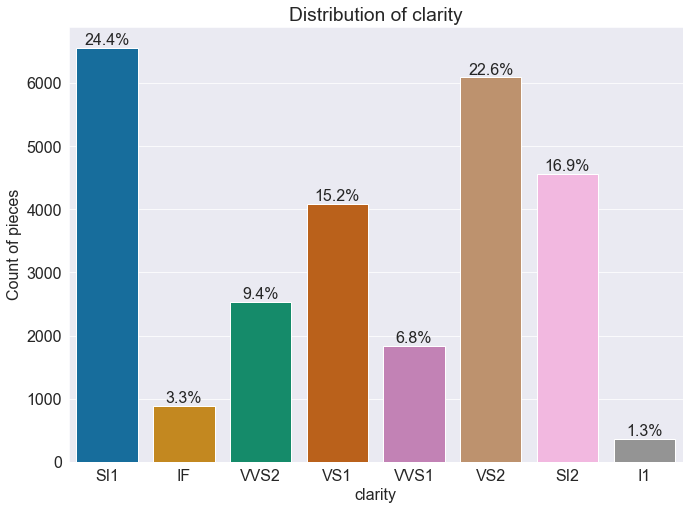

In [42]:
# Analyze the clarity variable In order from Best to Worst in terms of avg price.
#Clarity refers to the absence of the Inclusions and Blemishes

plt.figure(figsize=(11,8))
sns.set_style('darkgrid')
ax = sns.countplot(x='clarity', data=df, palette='colorblind')
plt.title('Distribution of clarity')
plt.xlabel('clarity')
plt.ylabel('Count of pieces')

ncount = len(df.cut)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

### Bivariate Analysis

#### Dependent  vs indepenent continuous variable

In [43]:
df.corrwith(df.price)

carat    0.922400
depth   -0.002683
table    0.126967
x        0.887467
y        0.857255
z        0.855775
price    1.000000
dtype: float64

In [44]:
# Checking for correlation coefficient and p value for all independent continuous variable vs price
from scipy import stats
stats.pearsonr(df['price'], df['carat'])

(0.9224003188935321, 0.0)

In [45]:
stats.pearsonr(df['price'], df['depth'])

(-0.0026827346073698827, 0.6598024279198186)

In [46]:
stats.pearsonr(df['price'], df['table'])

(0.12696735008877635, 3.702648981926378e-97)

In [47]:
stats.pearsonr(df['price'], df['x'])

(0.8874666462497192, 0.0)

In [48]:
stats.pearsonr(df['price'], df['y'])

(0.8572554365857494, 0.0)

In [49]:
stats.pearsonr(df['price'], df['z'])

(0.8557753620977029, 0.0)

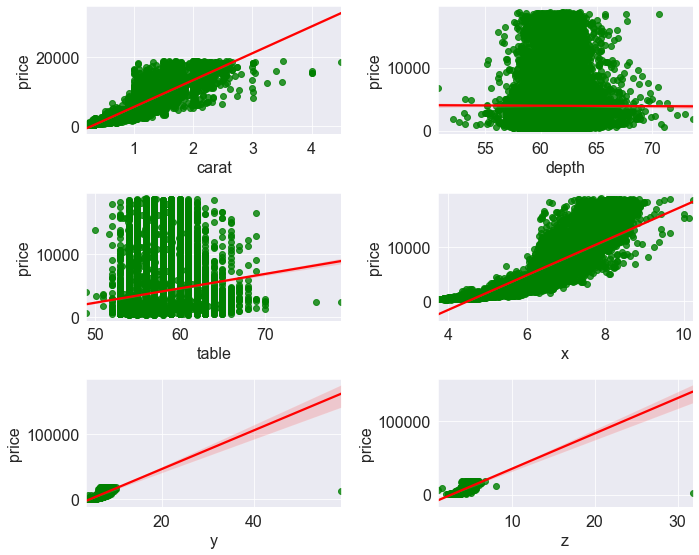

In [50]:
sns.set_style('darkgrid')
plt.subplots(figsize=(10,8))
plt.subplot(3,2,1)
sns.regplot(x="carat", y="price", data=df,scatter_kws={"color": "green"}, line_kws={"color": "red"})

# plt.title('Boxplot')
plt.subplot(3,2,2)
sns.regplot(x="depth", y="price", data=df,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(3,2,3)
sns.regplot(x="table", y="price", data=df,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(3,2,4)
sns.regplot(x="x", y="price", data=df,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(3,2,5)
sns.regplot(x="y", y="price", data=df,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(3,2,6)
sns.regplot(x="z", y="price", data=df,scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.tight_layout()


#### Dependent  vs indepenent Categorical variable

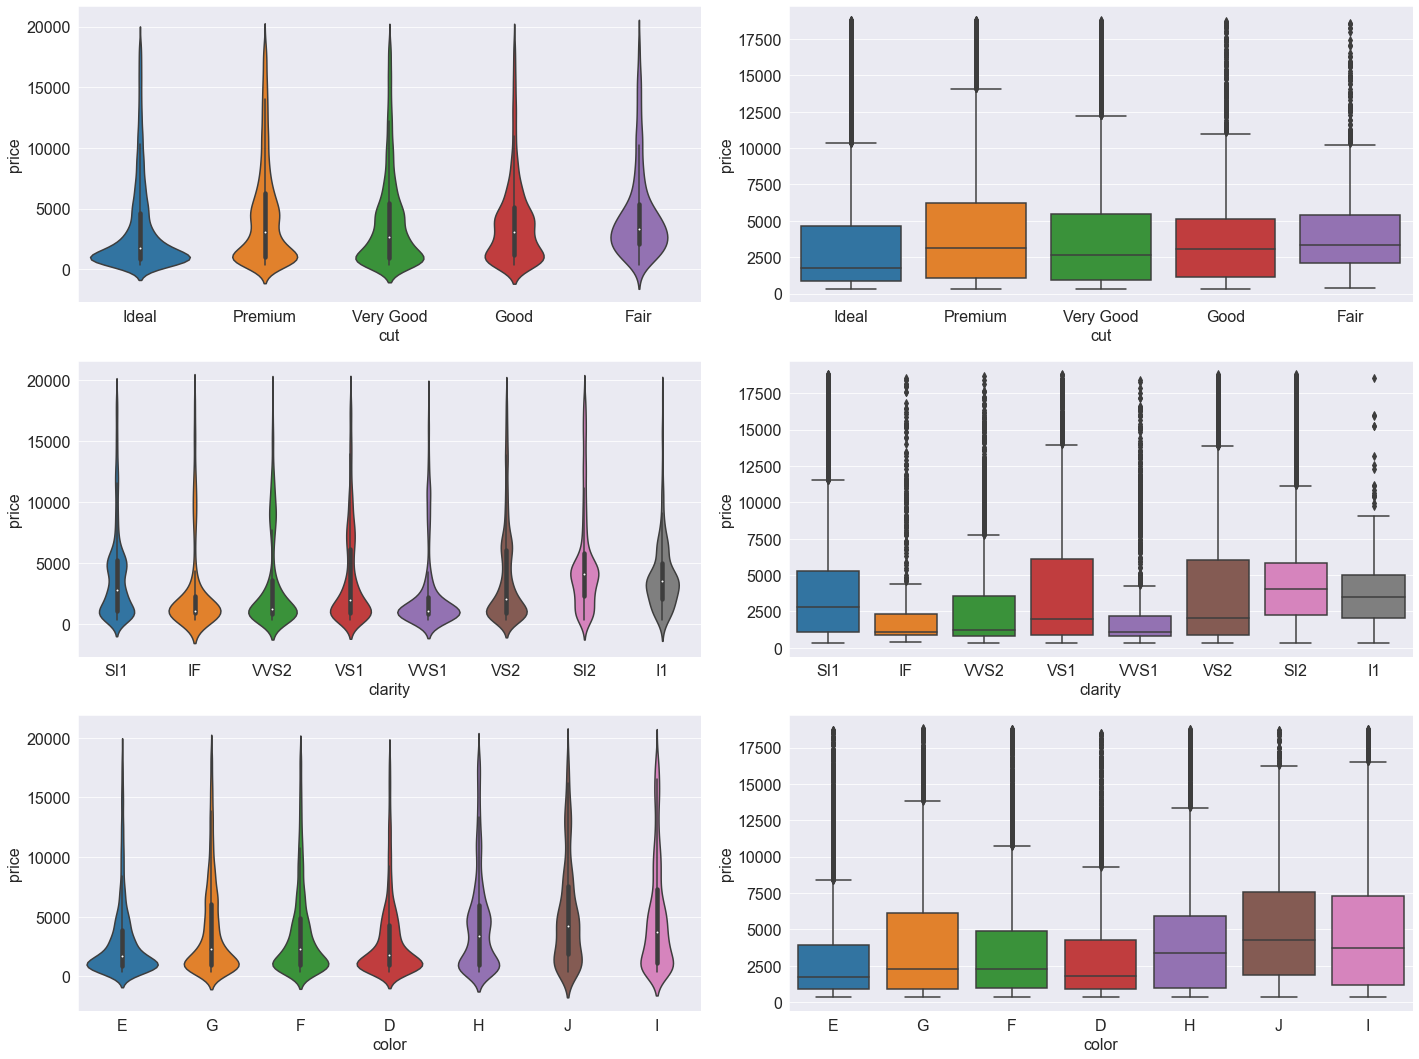

In [51]:
sns.set_style('darkgrid')
plt.subplots(figsize=(20,15))
plt.subplot(3,2,1)
sns.violinplot(x='cut', y='price',data=df)
plt.subplot(3,2,2)
sns.boxplot(x='cut', y='price', data=df)
plt.subplot(3,2,3)
sns.violinplot(x='clarity', y='price', data=df)
plt.subplot(3,2,4)
sns.boxplot(x='clarity', y='price', data=df)
plt.subplot(3,2,5)
sns.violinplot(x='color', y='price', data=df)
plt.subplot(3,2,6)
sns.boxplot(x='color', y='price', data=df)

plt.tight_layout()

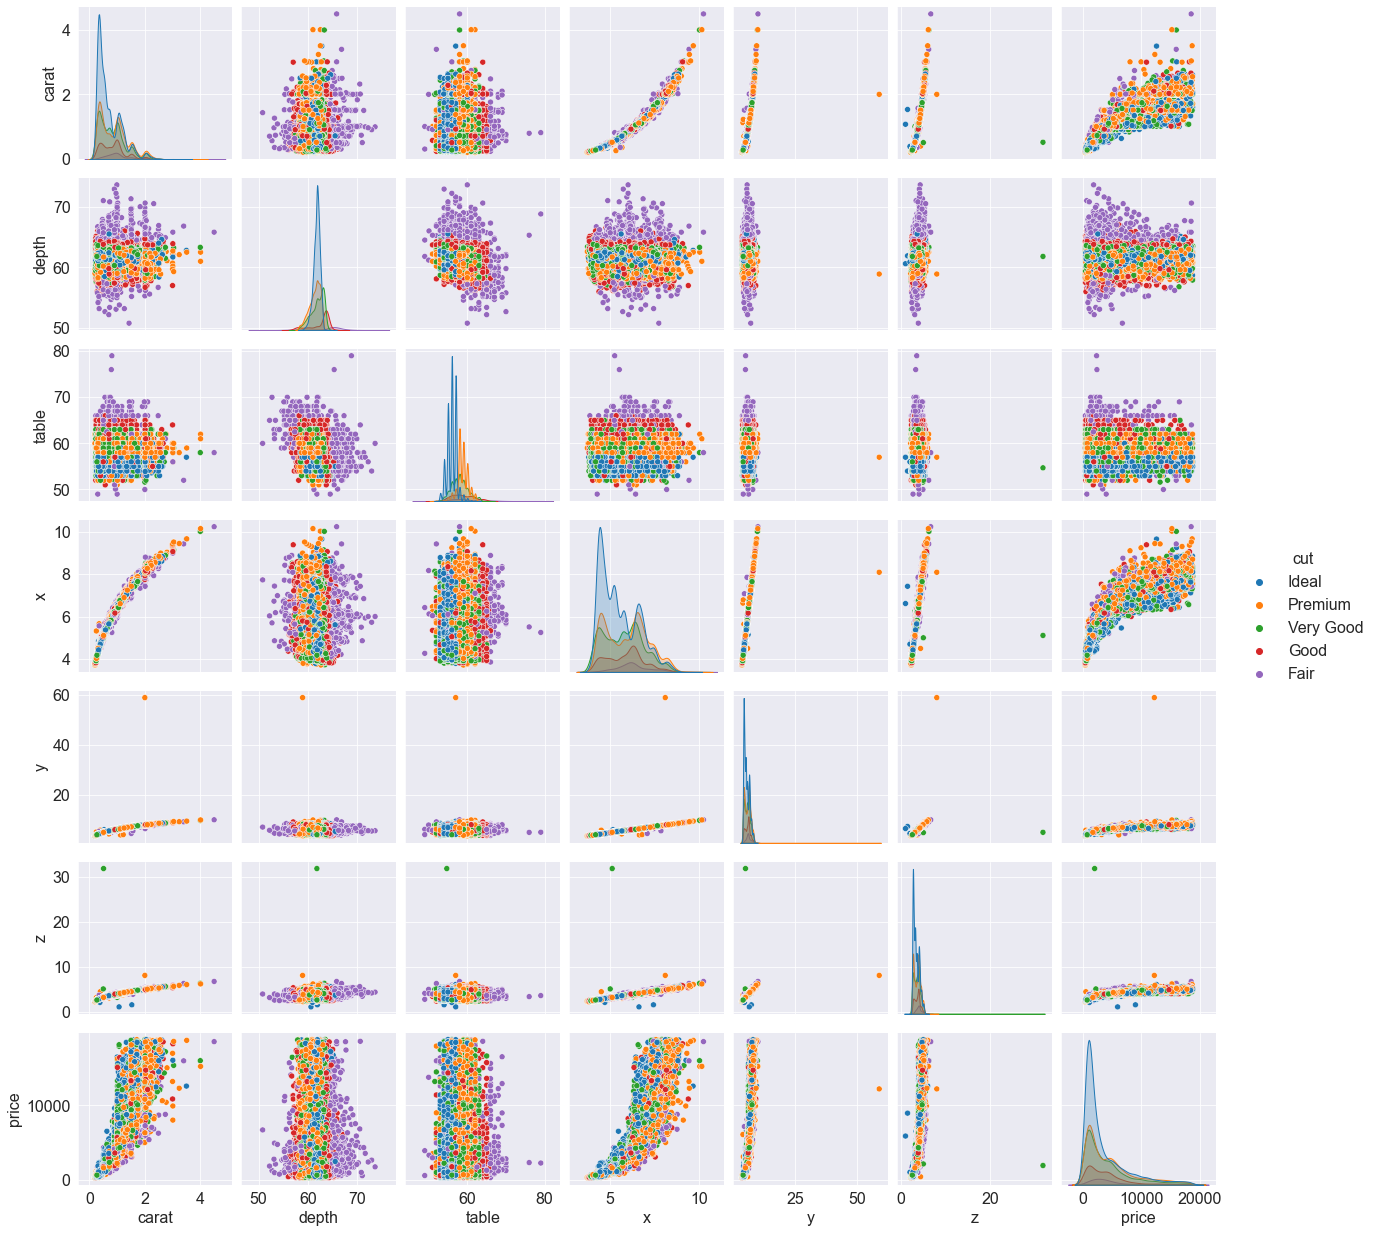

In [52]:
# Pairplot for analyzing the distribution of each varible and to check the multicoliniarity amongs the variables
sns.pairplot(df,diag_kind='kde',hue='cut') 


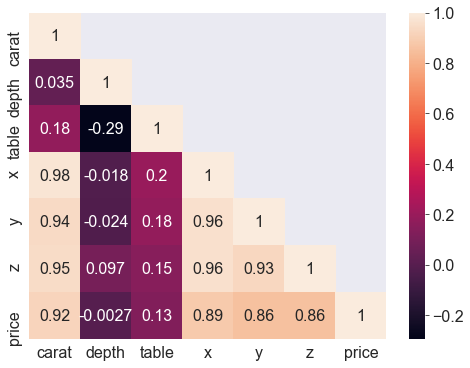

In [53]:
# heatmap for corelation values
corr1 = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr1,annot=True,mask=np.triu(corr1,+1));

From pairplot and heatmap we can see that there is positive correlation between Price  and carat,x,y,z variable
also x,y,z are multicoliniar varibles. we can say depth variable do not have corelation with price

### Data Preparation for Linear Regression

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,0.797821,0.477085,0.20,0.40,0.70,1.05,4.50
depth,26925.0,61.746982,1.393457,50.80,61.10,61.80,62.50,73.60
table,26925.0,57.455305,2.231327,49.00,56.00,57.00,59.00,79.00
x,26925.0,5.729385,1.126081,3.73,4.71,5.69,6.55,10.23
y,26925.0,5.733152,1.163820,3.71,4.71,5.70,6.54,58.90
z,26925.0,3.538820,0.717483,1.07,2.90,3.52,4.04,31.80
price,26925.0,3936.249991,4020.983187,326.00,945.00,2373.00,5353.00,18818.00


In [55]:
# As scaling do not have any impact on Regression model.lets skipp the scaling
# Regression model imapted by the oulier so lets check for outlies and according it we can treat outlier if applicable
# in our case all continuous variable have outliers

#### Outlier Treatment

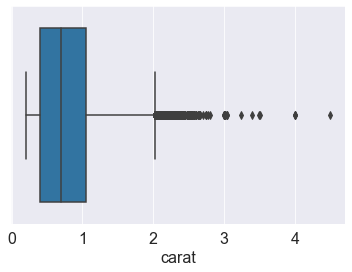

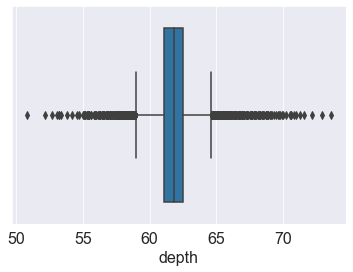

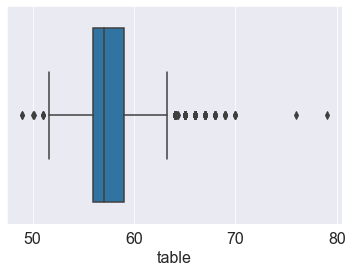

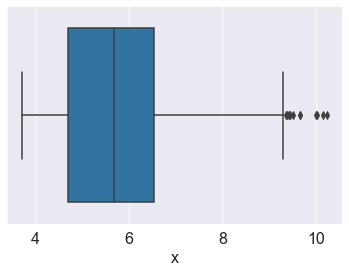

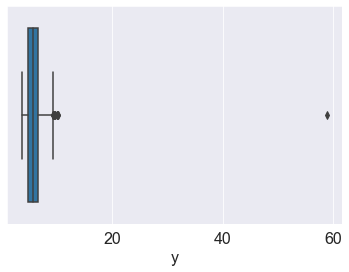

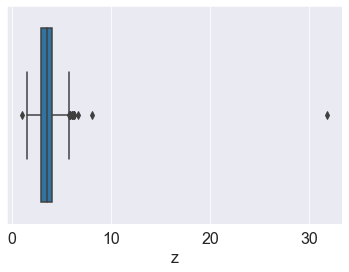

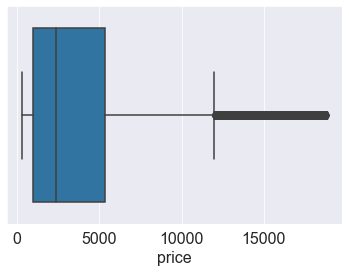

In [56]:
# checking outliers
colmn = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in colmn:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

In [57]:
# Outlier treatment :
def remove_outlier(colmn):
    sorted(colmn)
    Q1,Q3=np.percentile(colmn,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [58]:
for column in df[colmn].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

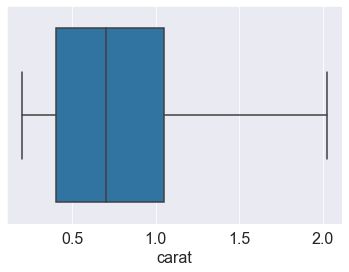

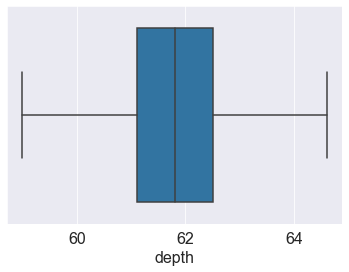

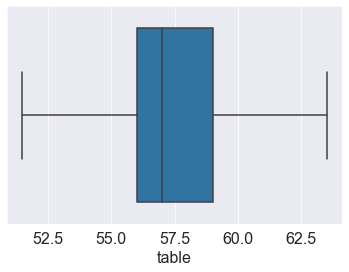

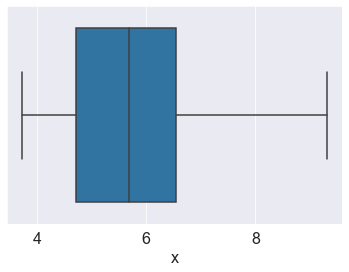

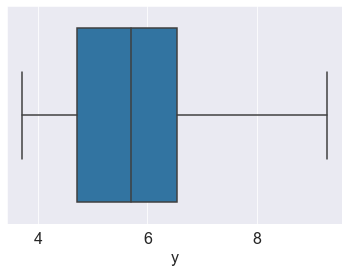

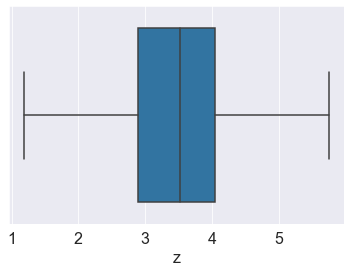

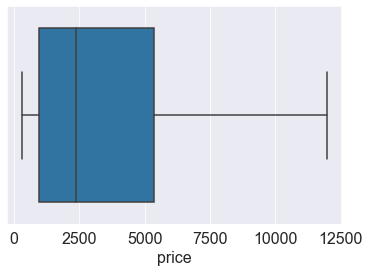

In [59]:
# checking outliers after teatment
colmn = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in colmn:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

In [60]:
# Correlation with the price variable
df.corrwith(df.price)

carat    0.936765
depth   -0.000845
table    0.137915
x        0.913409
y        0.914838
z        0.908599
price    1.000000
dtype: float64

 from the pairplot and heatmap we can see variable x, y and z are highly corelated to each other. we can make feature engineering here

In [61]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0


In [62]:
# make copy of data before any transformation 
data_df=df.copy()

In [63]:
data_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0


In [64]:
# Feature Enginering due to multicolinearity
data_df['volume']=df.x*df.y*df.z

In [65]:
data_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,volume
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0,48.726678
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0,53.225640
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0,139.726944
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0,68.482560
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0,51.066825


#### We can club the subcatagories of catagorical column as mension
* For Cut variable we can club ideal and premium under to ideal premium. Also for good and very good to good_very_good by putting fair as separate category.
* Same we can club for clarity VS1 and VS2 to VS1_2 also for SI1 and SI2 to SI1_2.
* For color category D and E to D_E. also for J and I to J_I.


In [66]:
## We are grouping certain types of 'cut' under different categories

data_df['cut']=np.where(data_df['cut'] =='Ideal', 'Ideal_Premium', data_df['cut'])
data_df['cut']=np.where(data_df['cut'] =='Premium', 'Ideal_Premium', data_df['cut'])
data_df['cut']=np.where(data_df['cut'] =='Good', 'Good_Very_Good', data_df['cut'])
data_df['cut']=np.where(data_df['cut'] =='Very Good', 'Good_Very_Good', data_df['cut'])

In [67]:
## We are grouping certain types of 'color' under different categories

data_df['color']=np.where(data_df['color'] =='D', 'D_E', data_df['color'])
data_df['color']=np.where(data_df['color'] =='E', 'D_E', data_df['color'])
data_df['color']=np.where(data_df['color'] =='J', 'J_I', data_df['color'])
data_df['color']=np.where(data_df['color'] =='I', 'J_I', data_df['color'])


In [68]:
## We are grouping certain types of 'color' under different categories

data_df['clarity']=np.where(data_df['clarity'] =='VS1', 'VS1_2', data_df['clarity'])
data_df['clarity']=np.where(data_df['clarity'] =='VS2', 'VS1_2', data_df['clarity'])
data_df['clarity']=np.where(data_df['clarity'] =='SI1', 'SI1_2', data_df['clarity'])
data_df['clarity']=np.where(data_df['clarity'] =='SI2', 'SI1_2', data_df['clarity'])

In [69]:
# to check the catagorical feature and its unique sub catagory after grouping
for i in data_df.columns: 
    if data_df[i].dtype == 'object': 
        print('\n')
        print('feature:',i)
        print(pd.Categorical(data_df[i].unique()))



feature: cut
['Ideal_Premium', 'Good_Very_Good', 'Fair']
Categories (3, object): ['Fair', 'Good_Very_Good', 'Ideal_Premium']


feature: color
['D_E', 'G', 'F', 'H', 'J_I']
Categories (5, object): ['D_E', 'F', 'G', 'H', 'J_I']


feature: clarity
['SI1_2', 'IF', 'VVS2', 'VS1_2', 'VVS1', 'I1']
Categories (6, object): ['I1', 'IF', 'SI1_2', 'VS1_2', 'VVS1', 'VVS2']


* For catagorical variable we have to labels it with numerical values. Lets replace the values of some of the categorical variable with ordinal labels


In [70]:
#For Cut variable  (Fair, Good, Very Good, Premium, Ideal) 
# we have to do label encoding here as variable are ordinal in nature

data_df.cut = data_df.cut.replace({'Fair': 1 , 'Good_Very_Good': 2 , 'Ideal_Premium': 3})

In [71]:
#For color variable  (D being the best and J the worst.)
data_df.color = data_df.color.replace({'D_E': 5, 'F': 4 , 'G': 3,'H': 2,'J_I':1})

In [72]:
#Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst in terms of avg price) 
#IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
data_df.clarity = data_df.clarity.replace({'IF': 6 , 'VVS1': 5 , 'VVS2': 4 , 'VS1_2': 3,'SI1_2':2,'I1':1})

In [73]:
data_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,volume
0,0.30,3,5,2,62.1,58.0,4.27,4.29,2.66,499.0,48.726678
1,0.33,3,3,6,60.8,58.0,4.42,4.46,2.70,984.0,53.225640
2,0.90,2,5,4,62.2,60.0,6.04,6.12,3.78,6289.0,139.726944
3,0.42,3,4,3,61.6,56.0,4.82,4.80,2.96,1082.0,68.482560
4,0.31,3,4,5,60.4,59.0,4.35,4.43,2.65,779.0,51.066825


In [74]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  int64  
 2   color    26925 non-null  int64  
 3   clarity  26925 non-null  int64  
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  float64
 10  volume   26925 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 3.5 MB


In [75]:
#Correlation with the price variable after labeled encoding
data_df.corrwith(data_df.price)

carat      0.936765
cut       -0.032577
color     -0.179915
clarity   -0.146694
depth     -0.000845
table      0.137915
x          0.913409
y          0.914838
z          0.908599
price      1.000000
volume     0.932768
dtype: float64

## Model 1 (Using All  original variable)

Here price is the dependent variable and other are predicting variable or indepenent variable

In [76]:
import statsmodels.formula.api as SM

In [77]:
formula_MLR1 ='price~ carat+cut+color+clarity+depth+table+x+y+z'

In [78]:
model_1 = SM.ols(formula=formula_MLR1, data=data_df).fit() 
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 3.580e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:34:08   Log-Likelihood:            -2.2317e+05
No. Observations:               26925   AIC:                         4.464e+05
Df Residuals:                   26915   BIC:                         4.464e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5416.2998    715.396     -7.571      0.0

In [79]:
coeff_MLR1 = model_1.params 
print(coeff_MLR1 )

Intercept   -5416.299789
carat        8801.427231
cut           230.355585
color         302.237938
clarity       586.088414
depth          44.223963
table         -26.461954
x           -1518.395973
y            1858.484905
z           -1214.563675
dtype: float64


*  Adj. R-squared: is 0.923 
* 92% variability in the dependent variable is being explained by the all variable.
* Here we observed p valuses for all variable is less than 0.05
* we can check for multicolinearity by usinf VIF score


In [80]:
# VIF score check function
def vif_cal(input_data):
    '''
    input_data: Dataframe of features
    '''
    c_vars = input_data
    cvar_names = input_data.columns
    for i in range(len(cvar_names)):
        d = c_vars[cvar_names[i]] 
        c = c_vars[cvar_names.drop(cvar_names[i])]
        rsq = SM.ols(formula="d~c", data=c_vars).fit().rsquared  
        vif = round(1/(1-rsq), 2)
        print (cvar_names[i], " VIF = " , vif)

In [81]:
vif_cal(input_data= data_df[['carat','cut','color','clarity','depth','table','x','y','z']])

carat  VIF =  33.01
cut  VIF =  1.3
color  VIF =  1.11
clarity  VIF =  1.2
depth  VIF =  4.42
table  VIF =  1.37
x  VIF =  427.15
y  VIF =  406.86
z  VIF =  234.91


* Taking the VIF 5 as threshold 
* For variables in model_1 VIF score for 3 variables that is X, Y, Z and Carat is higher it shows problem of multicolinearity


In [82]:
# for comparison perpuse we can save result of each model
model_name = []
model_perf = []

model_name.append('model_1_All_Variable')
model_perf.append(model_1.rsquared_adj)

In [83]:
model_perf

[0.9228765522722926]

## Model 2: Model using (carat and Price)
We can make different models with removing the hive viF variables but prior to that we can create one additional model with using high corelation variable that is carat

As we have seen carat is strongly correlated with the price variable with r = 0.9367 

In [84]:
formula_MLR2 ='price~ carat'

In [85]:
model_2 = SM.ols(formula=formula_MLR2, data=data_df).fit() 
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 1.929e+05
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:34:09   Log-Likelihood:            -2.2940e+05
No. Observations:               26925   AIC:                         4.588e+05
Df Residuals:                   26923   BIC:                         4.588e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1840.0601     14.688   -125.274      0.0

* 88% variability in the dependent variable is being explained only carat variable.


In [86]:
coeff_MLR2 = model_2.params 
print(coeff_MLR2 )

Intercept   -1840.060070
carat        7028.595315
dtype: float64


In [87]:
# Record keeping for Model 2
model_name.append('model_2_only carat variable')
model_perf.append(model_2.rsquared_adj)

## Model 3: (all variable except X,Y, Z i.e volume variable)

as the X, Y and Z variable have high multi colinearity from VIF score coliniarity with the carat variable

In [88]:
formula_MLR3 ='price~ carat+cut+color+clarity+depth+table'

In [89]:
model_3 = SM.ols(formula=formula_MLR3, data=data_df).fit() 
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 5.260e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:34:10   Log-Likelihood:            -2.2342e+05
No. Observations:               26925   AIC:                         4.469e+05
Df Residuals:                   26918   BIC:                         4.469e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2098.9609    462.112     -4.542      0.0

In [90]:
# coefficient and intercepth for model 3
model_3.params

Intercept   -2098.960930
carat        7808.752739
cut           196.451575
color         300.121570
clarity       608.462525
depth         -27.870809
table         -33.274390
dtype: float64

*  Adj. R-squared: is 0.921 not change compare to all variable 
* 92% variability in the dependent variable is being explained by the all variable Except X,Y and Z variable.
* Here we observed p valuses for all variable is less than 0.05
* check for VIF values 

In [91]:
vif_cal(input_data= data_df[['carat','cut','color','clarity','depth','table']])

carat  VIF =  1.27
cut  VIF =  1.25
color  VIF =  1.11
clarity  VIF =  1.16
depth  VIF =  1.29
table  VIF =  1.32


In [92]:
# Record keeping for Model 3
model_name.append('model_3_carat,cut,color,clarity,depth,table')
model_perf.append(model_3.rsquared_adj)

## Model 4: Using price ,carat, Cut ,color,clarity variable
as the X, Y and Z variable have high coliniarity with the carat variable
also excluding depth and table variable as it shows weak relationship with price


In [93]:
formula_MLR4 ='price~ carat+cut+color+clarity'

In [94]:
model_4 = SM.ols(formula=formula_MLR4, data=data_df).fit() 
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 7.855e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:34:10   Log-Likelihood:            -2.2348e+05
No. Observations:               26925   AIC:                         4.470e+05
Df Residuals:                   26920   BIC:                         4.470e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5861.4987     41.870   -139.992      0.0

*  Adj. R-squared: is 0.921 no improvement 
* 92% variability in the dependent variable is being explained by carat,cut,color,clarity variable.
* Here we observed p valuses for all variable is less than 0.05

In [95]:
# coefficient and intercepth for model 4
model_4.params

Intercept   -5861.498669
carat        7787.725728
cut           245.050239
color         300.203425
clarity       615.063197
dtype: float64

In [96]:
vif_cal(input_data= data_df[['carat','cut','color','clarity']])

carat  VIF =  1.24
cut  VIF =  1.02
color  VIF =  1.11
clarity  VIF =  1.14


* Taking the VIF 5 as threshold 
* for all variables in model_4 VIF score is less than 5  it shows all variable free with multicolinearity

In [97]:
# Record keeping for Model 4
model_name.append('model_4_carat,cut,color,clarity')
model_perf.append(model_4.rsquared_adj)

In [98]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

## Model 5: Using price , Cut , Color, Clarity and Volume 
as the X, Y and Z variable have high coliniarity with the carat variable we can replace carat with the derive feature volume
also excluding depth and table variable as it shows weak relationship with price


In [99]:
formula_MLR5 ='price~ cut+color+clarity+volume'
model_5 = SM.ols(formula=formula_MLR5, data=data_df).fit() 
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 6.835e+04
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:34:11   Log-Likelihood:            -2.2520e+05
No. Observations:               26925   AIC:                         4.504e+05
Df Residuals:                   26920   BIC:                         4.504e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5411.7835     44.222   -122.378      0.0

*  Adj. R-squared: is 0.91 there is drop in the adjusted R-square value 
* 91% variability in the dependent variable is being explained by cut,color,clarity and volume variable.
* Here we observed p valuses for all variable is less than 0.05

In [100]:
# coefficient and intercepth for model 5
model_5.params

Intercept   -5411.783535
cut           155.988095
color         298.086087
clarity       593.873630
volume         46.451298
dtype: float64

In [101]:
vif_cal(input_data= data_df[['cut','color','clarity','volume']])

cut  VIF =  1.02
color  VIF =  1.11
clarity  VIF =  1.14
volume  VIF =  1.24


* Taking the VIF 5 as threshold 
* for all variables in model_5, VIF score is less than 5 it shows all variable free with multicolinearity

In [102]:
# Record keeping for Model 5
model_name.append('model_5_cut,color,clarity,volume')
model_perf.append(model_5.rsquared_adj)

## Model 6: Using low VIF values 

In [103]:
vif_cal(input_data= data_df[['carat','cut','color','clarity','depth','table','volume']])

carat  VIF =  107.99
cut  VIF =  1.25
color  VIF =  1.11
clarity  VIF =  1.16
depth  VIF =  1.33
table  VIF =  1.35
volume  VIF =  107.13


* By comparing the VIF score carat shows 107.99 and volume shows 107.13  high VIF than othr variable
* Lets build the model excluding the high VIF carat and volume variable

In [104]:
formula_MLR6 ='price~ cut+color+clarity+depth+table'
model_6 = SM.ols(formula=formula_MLR6, data=data_df).fit() 
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     391.7
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:34:12   Log-Likelihood:            -2.5672e+05
No. Observations:               26925   AIC:                         5.135e+05
Df Residuals:                   26919   BIC:                         5.135e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.025e+04   1590.634     -6.442      0.0

In [105]:
# coefficient and intercepth for model 6
model_6.params

Intercept   -10247.034503
cut            167.656940
color         -427.111706
clarity       -425.328234
depth           70.069811
table          206.547244
dtype: float64

In [106]:
# Record keeping for Model 6
model_name.append('model_6_cut,color,clarity,depth,table')
model_perf.append(model_6.rsquared_adj)

# <font color = darkblue> Model Evaluation

In [107]:
model_eval = pd.DataFrame({'model_name': model_name, 'model_perf': model_perf})
model_eval

,model_name,model_perf
0,model_1_All_Variable,0.922877
1,model_2_only carat variable,0.877524
2,"model_3_carat,cut,color,clarity,depth,table",0.921391
3,"model_4_carat,cut,color,clarity",0.921070
4,"model_5_cut,color,clarity,volume",0.910347
5,"model_6_cut,color,clarity,depth,table",0.067648


* Model_4 and Model_5 shows highest Adj. R-squared values than other models with less number of predicting variables
* also this two model are fee of multicolinearity
* lets calculate RMSE values for model prediction


### Model 3 & 4 - Prediction

In [108]:
model_4_pred = model_4.fittedvalues
model_5_pred = model_5.fittedvalues

### RMSE For Model 3 and model 4

In [109]:
from sklearn import metrics

In [110]:
print('Model_4:',metrics.mean_squared_error(data_df['price'], model_4_pred, squared=False))
print('Model_5:',metrics.mean_squared_error(data_df['price'], model_5_pred, squared=False))

Model_4: 973.7741948477665
Model_5: 1037.8180349238996


* The RMSE is the square root of the variance of the residuals. Lower values of RMSE indicate better fit
* Here model 4 is the better fit model amongs the all models as it has low RMSE than model_5


Model 4 has lower RMSE value so model 4 would be the better fit model for prediction. keeping the fact in mind that The best descriptive model might not be the best predictive model.

# <font color = darkblue>Only for Predictive purposes of Linear Regression
---

- If we only wanted to predict using Linear Regression and were not looking for the model building aspect of it, we can do that as well. 
- For this exercise, we will use the same variables as of Model 2, and model3
###  Key Differences in Predictive Modelling
- #### We will split the data into train and test and get an idea about the expected quality of predictions in future.
- #### We will need to choose a metric of interest. Lets choose RMSE.
- #### build the model on the training data and check the RMSE on the test data.

###### Note: We are going to build all the models, get their predictions and then go on to evaluate those models.

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
lr = LinearRegression()

In [113]:
data_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,volume
0,0.30,3,5,2,62.1,58.0,4.27,4.29,2.66,499.0,48.726678
1,0.33,3,3,6,60.8,58.0,4.42,4.46,2.70,984.0,53.225640
2,0.90,2,5,4,62.2,60.0,6.04,6.12,3.78,6289.0,139.726944
3,0.42,3,4,3,61.6,56.0,4.82,4.80,2.96,1082.0,68.482560
4,0.31,3,4,5,60.4,59.0,4.35,4.43,2.65,779.0,51.066825


Splitting the data into the dependent and independent variables.

In [114]:
X = data_df.drop('price', axis=1)
Y = data_df['price']

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [117]:
X_train.shape

(18847, 10)

In [118]:
X_test.shape

(8078, 10)

In [119]:
Y_test.shape

(8078,)

### Using the same variables selection in the descriptive approch we can  built the different model .also build the model on the training data and predict on the training as well as test data.

### Model_sk_1 Using all variable

In [120]:
# Variable consider in Model 3 for evaluation
M1_var=['carat', 'cut', 'color', 'clarity', 'depth', 'table','x','y','z']

In [121]:
model_sk_1 = lr.fit(X_train[M1_var], Y_train)
#We are only using Linear Regression as a predictive tool and not a descriptive tool

In [122]:
#Training Data Prediction
model_sk_1_pred_train = model_sk_1.predict(X_train[M1_var])

In [123]:
## R square on training data
model_sk_1.score(X_train[M1_var], Y_train)

0.9228133506833001

In [124]:
#Test Data Prediction
model_sk_1_pred_test = model_sk_1.predict(X_test[M1_var])

In [125]:
## R square on tesing data
model_sk_1.score(X_test[M1_var], Y_test)

0.9229507699517261

### Model_sk_2 Using carat variable

In [126]:
# Variable consider in Model 2 for evaluation
M2_var=['carat']
model_sk_2 = lr.fit(X_train[M2_var], Y_train)

In [127]:
#Training Data Prediction
model_sk_2_pred_train = model_sk_2.predict(X_train[M2_var])
#Test Data Prediction
model_sk_2_pred_test = model_sk_2.predict(X_test[M2_var])

In [128]:
## R square on training data
print('R-Square train : ',model_sk_2.score(X_train[M2_var], Y_train))
## R square on testing data
print('R-Square test : ',model_sk_2.score(X_test[M2_var], Y_test))

R-Square train :  0.8764485575124065
R-Square test :  0.879996108013306


### Model_sk_3 Using carat,cut,color,clarity,depth,table variable

In [129]:
# Variable consider in Model 3 for evaluation
M3_var=['carat', 'cut', 'color', 'clarity', 'depth', 'table']
model_sk_3 = lr.fit(X_train[M3_var], Y_train)

In [130]:
#Training Data Prediction
model_sk_3_pred_train = model_sk_3.predict(X_train[M3_var])
#Test Data Prediction
model_sk_3_pred_test = model_sk_3.predict(X_test[M3_var])

In [131]:
## R square on training data
print('R-Square train : ',model_sk_3.score(X_train[M3_var], Y_train))
## R square on testing data
print('R-Square test : ',model_sk_3.score(X_test[M3_var], Y_test))

R-Square train :  0.921264068150337
R-Square test :  0.9216997992689793


### Model_sk_4 Using carat,cut,color,clarity variable

In [132]:
# Variable consider in Model 4 for evaluation
M4_var=['carat', 'cut', 'color', 'clarity']
model_sk_4 = lr.fit(X_train[M4_var], Y_train)

In [133]:
#Training Data Prediction
model_sk_4_pred_train = model_sk_4.predict(X_train[M4_var])
#Test Data Prediction
model_sk_4_pred_test = model_sk_4.predict(X_test[M4_var])

In [134]:
## R square on training data
print('R-Square train : ',model_sk_4.score(X_train[M4_var], Y_train))
## R square on testing data
print('R-Square test : ',model_sk_4.score(X_test[M4_var], Y_test))

R-Square train :  0.920869835956943
R-Square test :  0.9215421016449044


### Model_sk_5 Using cut,color,clarity,volume variable

In [135]:
# Variable consider in Model 5 for evaluation
M5_var=['cut', 'color', 'clarity','volume']
model_sk_5 = lr.fit(X_train[M5_var], Y_train)

In [136]:
# #Training Data Prediction
model_sk_5_pred_train = model_sk_5.predict(X_train[M5_var])
# #Test Data Prediction
model_sk_5_pred_test = model_sk_5.predict(X_test[M5_var])

In [137]:
## R square on training data
print('R-Square train : ',model_sk_5.score(X_train[M5_var], Y_train))
## R square on testing data
print('R-Square test : ',model_sk_5.score(X_test[M5_var], Y_test))

R-Square train :  0.9100410784744712
R-Square test :  0.9110775940037303


### Model_sk_6 Using cut,color,clarity,depth,table variable

In [138]:
# Variable consider in Model 3 for evaluation
M6_var=['cut', 'color', 'clarity', 'depth', 'table']
model_sk_6 = lr.fit(X_train[M6_var], Y_train)

In [139]:
#Training Data Prediction
model_sk_6_pred_train = model_sk_6.predict(X_train[M6_var])
#Test Data Prediction
model_sk_6_pred_test = model_sk_6.predict(X_test[M6_var])

In [140]:
## R square on training data
print('R-Square train : ', model_sk_6.score(X_train[M6_var], Y_train))
## R square on testing data
print('R-Square test : ',model_sk_6.score(X_test[M6_var], Y_test))

R-Square train :  0.06750390662743455
R-Square test :  0.06823411506088273


## RMSE check for all the models built on Train and Test data

In [141]:
print('Training Data RMSE of model_sk_1:',metrics.mean_squared_error(Y_train,model_sk_1_pred_train,squared=False))
print('Test Data RMSE of model_sk_1:',metrics.mean_squared_error(Y_test,model_sk_1_pred_test,squared=False))
print('Training Data RMSE of model_sk_2:',metrics.mean_squared_error(Y_train,model_sk_2_pred_train,squared=False))
print('Test Data RMSE of model_sk_2:',metrics.mean_squared_error(Y_test,model_sk_2_pred_test,squared=False))
print('Training Data RMSE of model_sk_3:',metrics.mean_squared_error(Y_train,model_sk_3_pred_train,squared=False))
print('Test Data RMSE of model_sk_3:',metrics.mean_squared_error(Y_test,model_sk_3_pred_test,squared=False))
print('Training Data RMSE of model_sk_4:',metrics.mean_squared_error(Y_train,model_sk_4_pred_train,squared=False))
print('Test Data RMSE of model_sk_4:',metrics.mean_squared_error(Y_test,model_sk_4_pred_test,squared=False))
print('Training Data RMSE of model_sk_5:',metrics.mean_squared_error(Y_train,model_sk_5_pred_train,squared=False))
print('Test Data RMSE of model_sk_5:',metrics.mean_squared_error(Y_test,model_sk_5_pred_test,squared=False))
print('Training Data RMSE of model_sk_6:',metrics.mean_squared_error(Y_train,model_sk_6_pred_train,squared=False))
print('Test Data RMSE of model_sk_6:',metrics.mean_squared_error(Y_test,model_sk_6_pred_test,squared=False))

Training Data RMSE of model_sk_1: 960.7862185451642
Test Data RMSE of model_sk_1: 967.3828303082391
Training Data RMSE of model_sk_2: 1215.5689015329667
Test Data RMSE of model_sk_2: 1207.2907942886004
Training Data RMSE of model_sk_3: 970.3807141772422
Test Data RMSE of model_sk_3: 975.20442026634
Training Data RMSE of model_sk_4: 972.8070374467362
Test Data RMSE of model_sk_4: 976.185963506578
Training Data RMSE of model_sk_5: 1037.23649940776
Test Data RMSE of model_sk_5: 1039.2495040238566
Training Data RMSE of model_sk_6: 3339.48257097699
Test Data RMSE of model_sk_6: 3364.090155712628


#### Model 4 with variable only 4 depenent variable is most suitable for prescriptive analysis having variable 'cut', 'color', 'clarity','carat ' 

<li style="font-family:'Times New Roman';font-weight: bold;font-size:30px;color:#2b31ab"">Problem: 2 </li>

<li style="font-family:'Times New Roman';font-weight: bold;font-size:25px;color:#2b31ab""> Logistic Regression  </li>

### Problem Statement:
You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

#### Data Dictionary Holiday packages:

* Holiday_Package     :  Opted for Holiday Package yes/no?
* Salary              : Employee salary
* age                 : Age in years
* edu                 :	Years of formal education
* no_young_children   :	The number of young children (younger than 7 years)
* no_older_children   :	Number of older children
* foreign : foreigner : Yes/No

#### 2.1 The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, especially identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have a symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. For this is a classification problem, the dependence of the response on the predictors needs to be investigated

#### 2.2 Build various iterations of the Logistic Regression model using appropriate variable selection techniques for the full data. Compare values of model selection criteria for proposed models. Compare as many criteria as you feel are suitable. Use Full Data to develop a logistic regression model to identify significant predictors. Check whether the proposed model is free of multicollinearity. Apply variable selection method as required. Show all intermediate models leading to the final model. Justify your choice of the final model. Which are the significant predictors?

#### 2.3 Split the data into training (70%) and test (30%). Build the various iterations of the Logistic Regression models on the training data and use those models to predict on the test data using appropriate model evaluation metrics.If prediction accuracy of the full scholarship is the only objective, then you may want to divide the data into a training and a test set, chosen randomly, and use the training set to develop a model and test set to validate your model. Use the models developed in Part (II) to compare accuracy in training and test sets. Compare the final model of Part (II) and the proposed one in Part (III). Which model provides the most accurate prediction? If the model found in Part (II) is different from the proposed model in Part (III), give an explanation.

### Loading the data set

In [142]:
hol_pk=pd.read_csv('Holiday_Package.csv')

In [143]:
hol_pk.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


### Basic Data Exploration

In [144]:
hol_pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


* from data unnamed is the serieal number column we do not have any significance of it we can drop it.
* dropping unnamed column we remaince with 2 object type and 5 integer type variable

In [145]:
# unnamed 0 serial number and not significant column here so we can drop it
hol_pk=hol_pk.drop('Unnamed: 0',axis=1)

In [146]:
hol_pk.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [147]:
hol_pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [148]:
hol_pk.describe(include='all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [149]:
hol_pk.shape

(872, 7)

In [150]:
# to check the catagorical feature and its unique sub catagory
for i in hol_pk.columns: 
    if hol_pk[i].dtype == 'object': 
        print('\n')
        print('feature:',i)
        print(pd.Categorical(hol_pk[i].unique()))



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']


In [151]:
#Checking for missing Values
hol_pk.isna().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [152]:
#Checking for ducplicate Value
dup = hol_pk.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


* No missing values and duplicate values in the dataset

In [153]:
# checking for descriptive stats summary
hol_pk.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
hol_pk.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [155]:
hol_pk.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [156]:
hol_pk.no_young_children.value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [157]:
hol_pk.foreign.value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [158]:
hol_pk.no_older_children.value_counts()

0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

* Salary columns is positivly skewed along with number of young children column
* Proportion of Yes and No for holyday package is good balanced
* no_older_children and no_young_children is a discrete data we can convert it into the objetct datattpe to treat is as categorical

In [159]:
data_hol_pk1=hol_pk.copy()

In [160]:
# no_older_children and no_young_children is a discrete data we can convert it into the catagories
hol_pk.no_young_children=hol_pk.no_young_children.astype('object')
hol_pk.no_older_children=hol_pk.no_older_children.astype('object')

### Univariate Analysis

In [161]:
hol_pk.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0


In [162]:
# cheking for skewness and kurtosis of variable
table1 = pd.concat([hol_pk.skew(), hol_pk.kurtosis()], axis=1, join="inner")
table1=table1.rename(columns={0:'Skewness',1:'kurtosis'})
table1

,Skewness,kurtosis
Salary,3.103216,15.852557
age,0.146412,-0.909962
educ,-0.045501,0.005558
no_young_children,1.946515,3.109892
no_older_children,0.953951,0.676017


In [163]:
# Function for univariate data analysis
def univariate_analysis2(column,nbins):
    print("Distribution of " + column)
    print('------------------------------------------------')
    sns.histplot(hol_pk[column], kde=True,palette='colorblind');
    plt.show()
    
    print("BoxPlot of " + column)
    print('------------------------------------------------')
    ax = sns.boxplot(x=hol_pk[column],color='y')
    plt.show()

In [164]:
df_num1=hol_pk.select_dtypes(include=('float64','int64'))

In [165]:
numeric_columns1 = list(df_num1.columns.values)

Distribution of Salary
------------------------------------------------


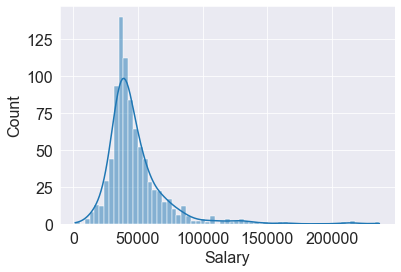

BoxPlot of Salary
------------------------------------------------


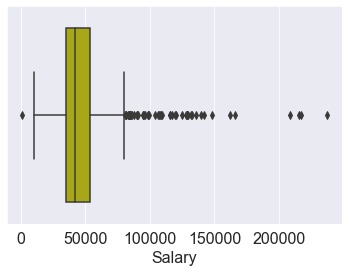

Distribution of age
------------------------------------------------


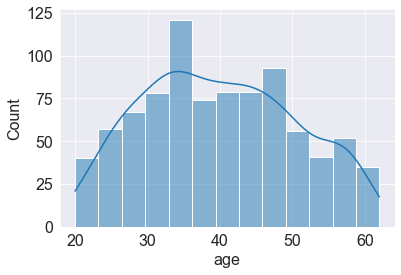

BoxPlot of age
------------------------------------------------


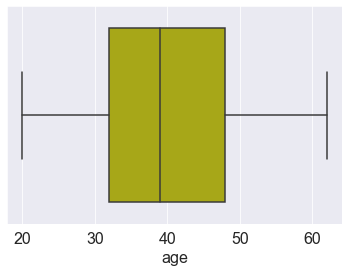

Distribution of educ
------------------------------------------------


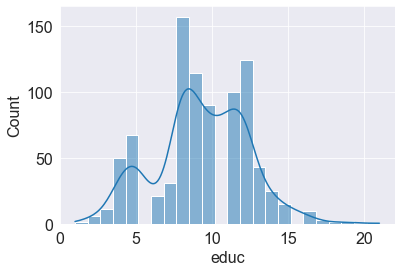

BoxPlot of educ
------------------------------------------------


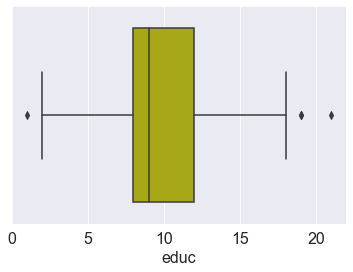

In [166]:
for x in numeric_columns1:
    univariate_analysis2(x,5)

* Outlier in the dataset for  salary ,education,number of young children and number of older children variable.
* Age variable do not have outlier in the dataset

## Categorical Variable

In [167]:
cat_var=hol_pk.select_dtypes(include='object')
cat_var

,Holliday_Package,no_young_children,no_older_children,foreign
0,no,1,1,no
1,yes,0,1,no
2,no,0,0,no
3,no,2,0,no
4,no,0,2,no
...,...,...,...,...
867,no,2,1,yes
868,yes,0,0,yes
869,no,2,0,yes
870,yes,0,1,yes


In [168]:
## Catagorical variable analysis
def univariateAnalysis_cat(column):
    plt.figure()
    plt.figure(figsize=(9,7))
    print("Count of " + column)
    print("---------------------------------------------------------------------------")
    sns.set_style("darkgrid")
    ay=sns.countplot(data=cat_var,x=cat_var[column])
    plt.ylabel("Count of Packages")
    
    ncount=872
    
    for p in ay.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
    plt.show()

In [169]:
list_df_cat=list(cat_var.columns.values)

Count of Holliday_Package
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

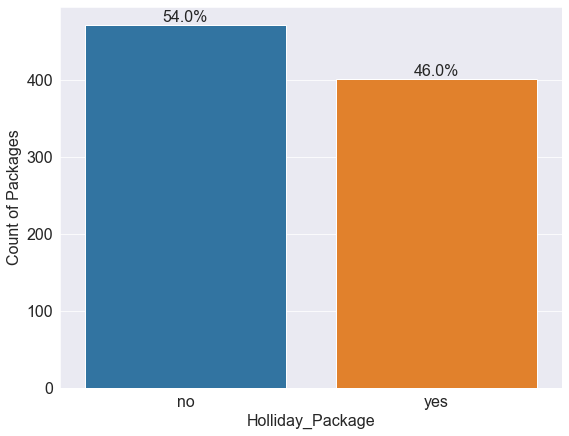

Count of no_young_children
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

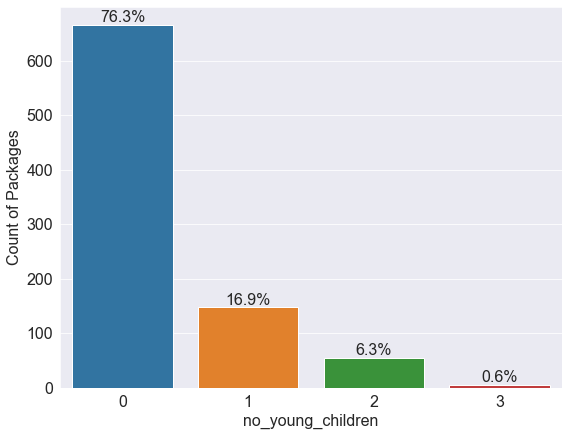

Count of no_older_children
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

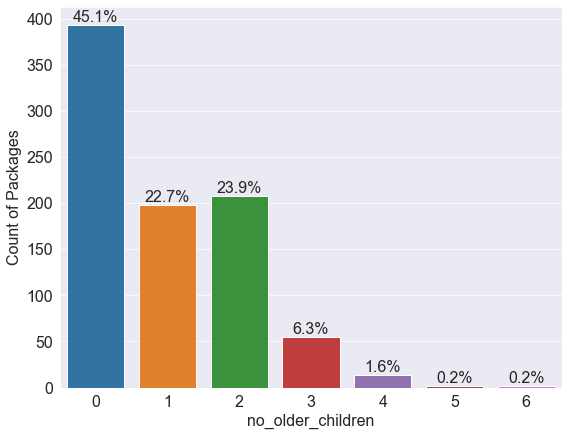

Count of foreign
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

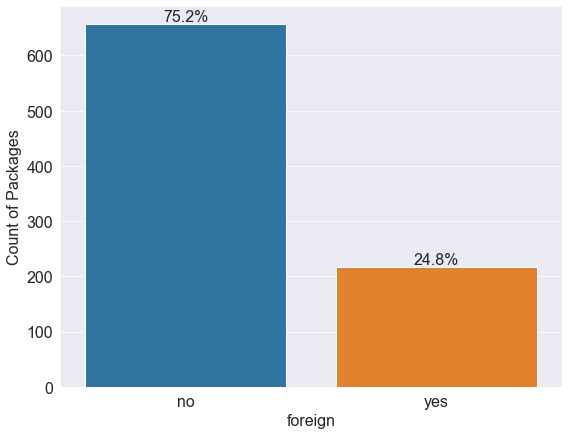

In [170]:
for x in list_df_cat:
    univariateAnalysis_cat(x)

### Categorical vs Categorical

In [171]:
hol_pk.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [172]:
df_Cat1=hol_pk.select_dtypes(include=('object'))

In [173]:
def bivariateAnalysis_cat(column):
    plt.figure()
    plt.figure(figsize=(15,10))
    print("Count of " + column)
    print("---------------------------------------------------------------------------")
    sns.set_style("darkgrid")
    ay=sns.countplot(data=df_Cat1,x=df_Cat1[column],hue='Holliday_Package')
    plt.ylabel("Count of insurance")
    
    ncount=872
    
    for p in ay.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    plt.show()


In [174]:
list_df_cat=list(df_Cat1.columns.values)

In [175]:
len(list_df_cat)

4

Count of Holliday_Package
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

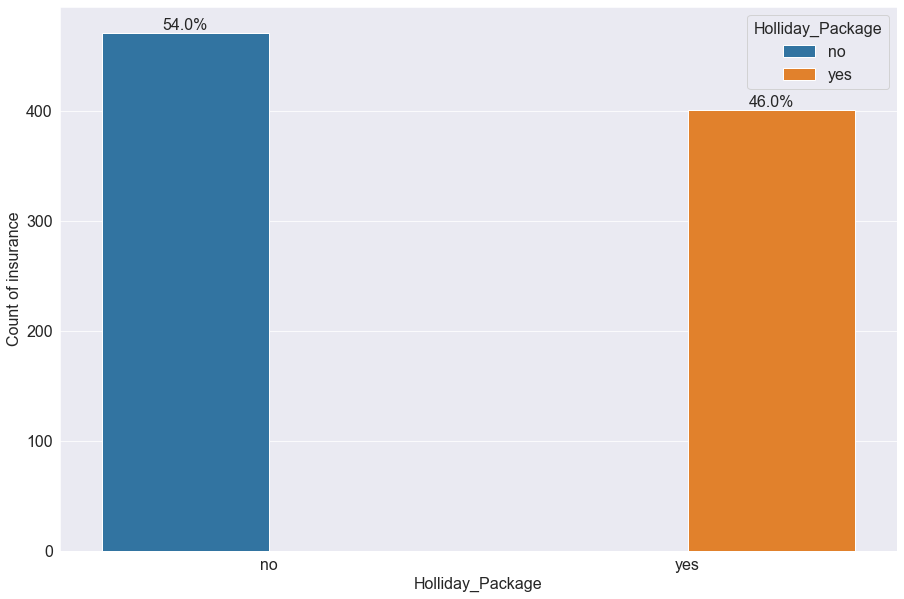

Count of no_young_children
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

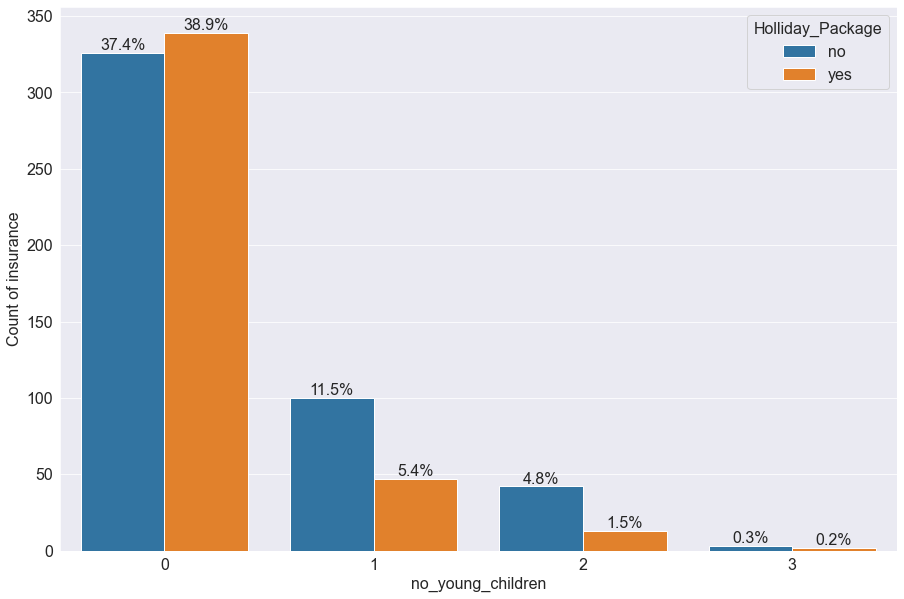

Count of no_older_children
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

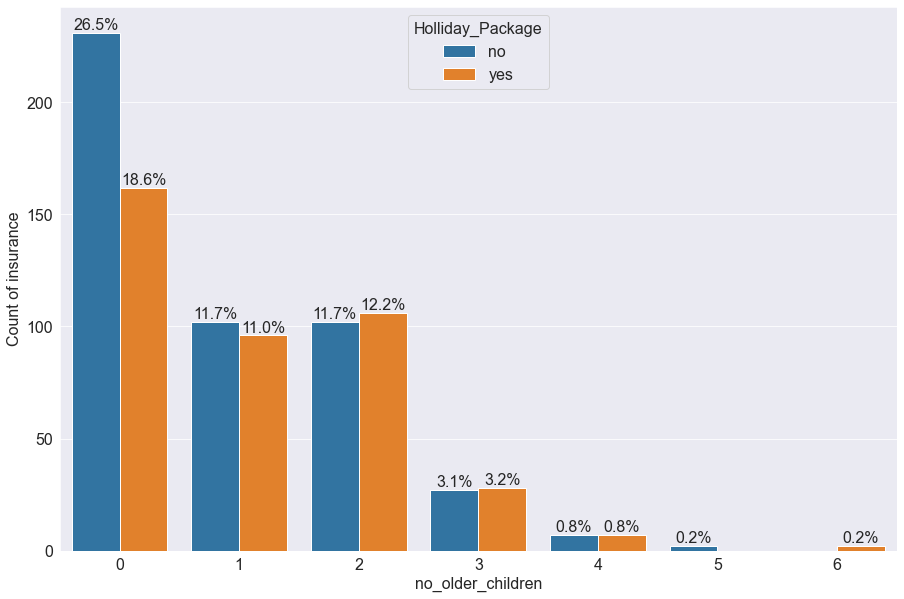

Count of foreign
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

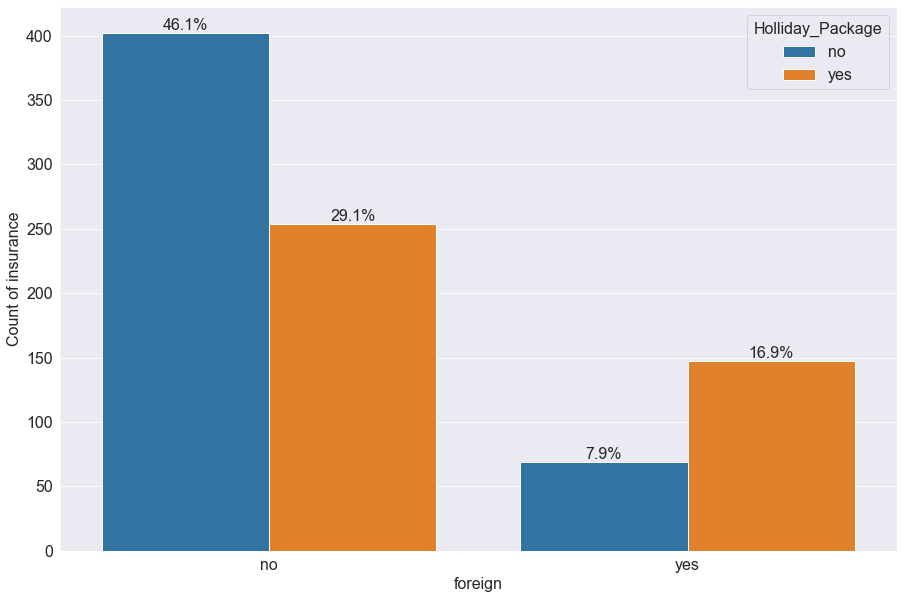

In [176]:
for x in list_df_cat:
    bivariateAnalysis_cat(x)

* comparitively Foreigner buy more holiday packages than the others

### Target variables vs Numeric

<AxesSubplot:xlabel='Salary', ylabel='Holliday_Package'>

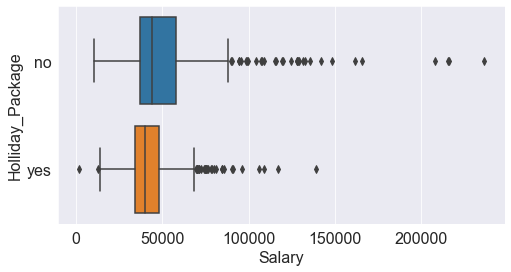

In [177]:
## Analyzing Holliday package distribution according to salary

plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.boxplot(x='Salary', y='Holliday_Package', data=hol_pk)

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

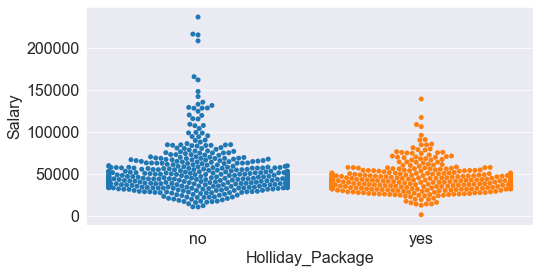

In [178]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.swarmplot(x='Holliday_Package', y='Salary',data=hol_pk,)

<AxesSubplot:xlabel='Holliday_Package', ylabel='age'>

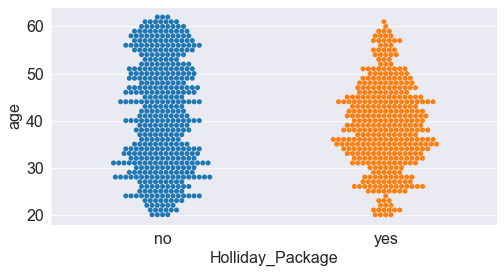

In [179]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.swarmplot(x='Holliday_Package', y='age',data=hol_pk,)

<AxesSubplot:xlabel='age', ylabel='Holliday_Package'>

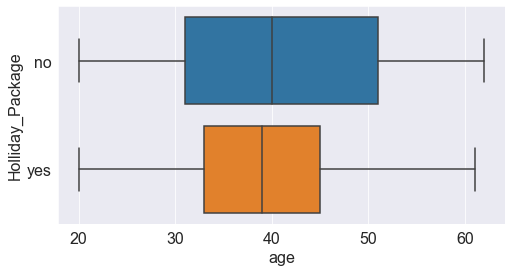

In [180]:
## Analyzing Holliday package distribution according to Age

plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.boxplot(x='age', y='Holliday_Package', data=hol_pk)

<AxesSubplot:xlabel='educ', ylabel='Holliday_Package'>

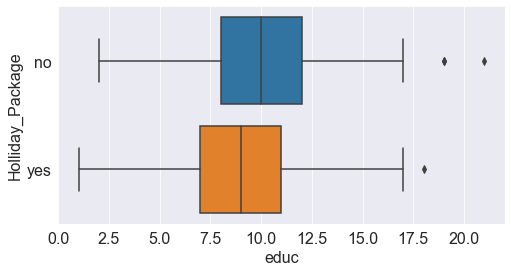

In [181]:
## Analyzing Holliday package distribution according to Education

plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.boxplot(x='educ', y='Holliday_Package', data=hol_pk)

<AxesSubplot:xlabel='Holliday_Package', ylabel='educ'>

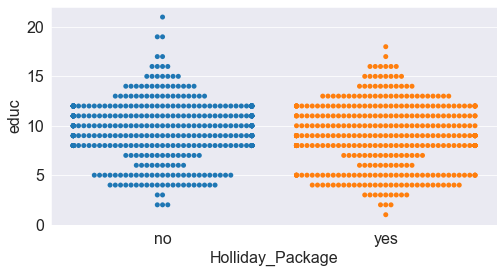

In [182]:
## Analyzing Holliday package distribution according to Education

plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.swarmplot(x='Holliday_Package', y='educ',data=hol_pk,)

In [183]:
hol_pk.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

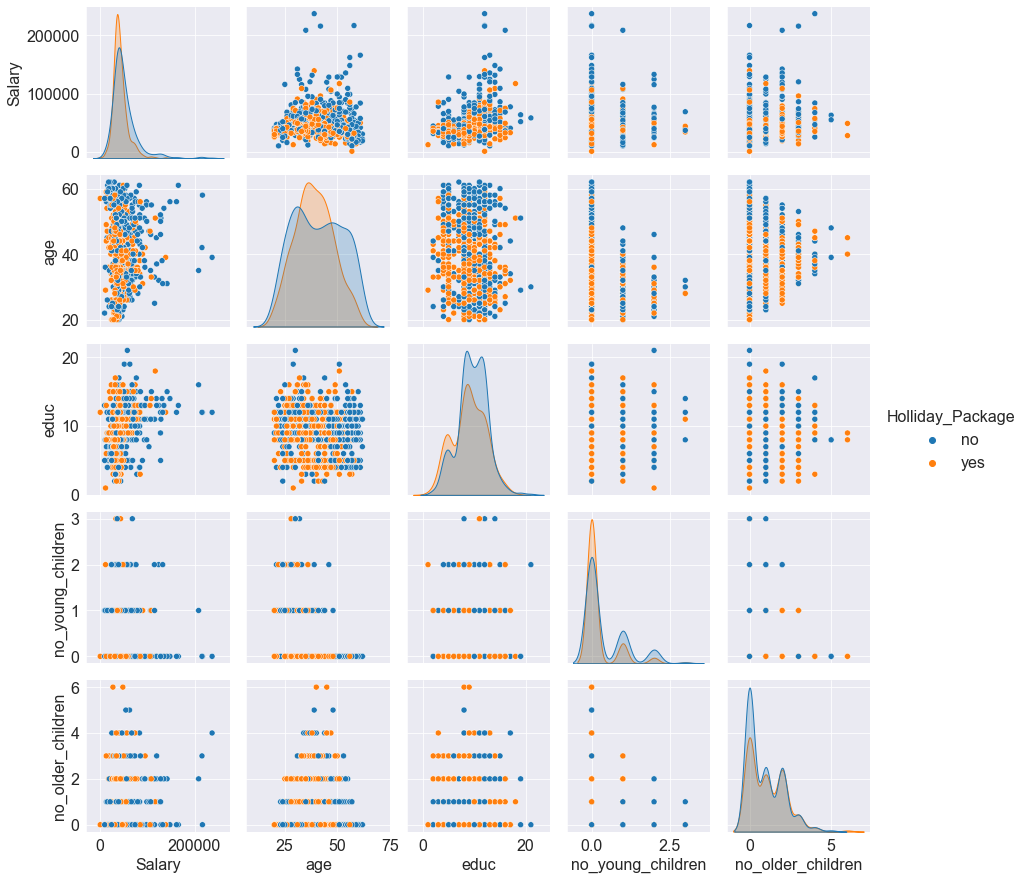

In [184]:
## Check Pairplot for of variables

ax=sns.pairplot(data_hol_pk1,diag_kind='kde', hue='Holliday_Package')

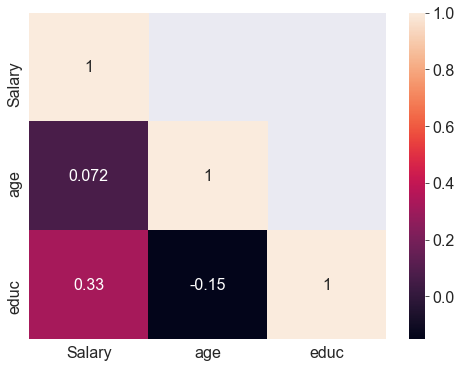

In [185]:
# heatmap for corelation values
corr1 = hol_pk.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr1,annot=True,mask=np.triu(corr1,+1));

### Data Preparation for Logistic Regression

In [186]:
## Making copy of original data
data_hol_pk=hol_pk.copy()

In [187]:
data_hol_pk.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [188]:
data_hol_pk.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0


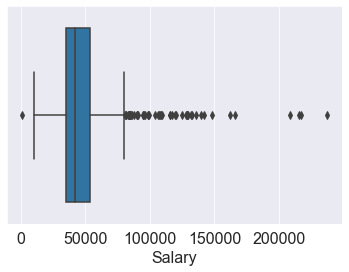

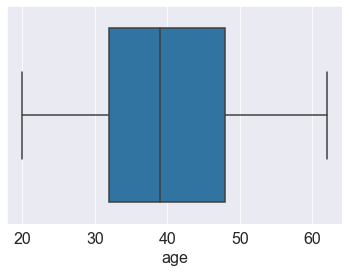

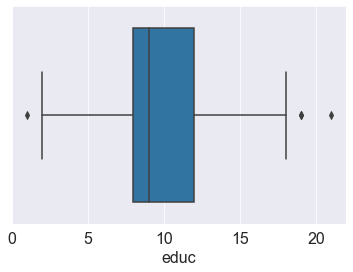

In [189]:
# checking outliers
colmn1 = ['Salary','age', 'educ']
for i in colmn1:
    sns.boxplot(data_hol_pk[i],whis=1.5)
    plt.show();

* Salary variable show the outlier in the data which is acceptable
* also education variable show few outlier at lower and upper side(few oulier we can keep them as is)

### Handling categorical text Variables

In [190]:
data_hol_pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    object
 5   no_older_children  872 non-null    object
 6   foreign            872 non-null    object
dtypes: int64(3), object(4)
memory usage: 47.8+ KB


In [191]:
## Converting the other 'object' type variables as dummy variables as they are nominal in nature we can do one hot encoding here

hol_pk_dummy = pd.get_dummies(data_hol_pk,drop_first=True)
hol_pk_dummy.head()

,Salary,age,educ,Holliday_Package_yes,no_young_children_1,no_young_children_2,no_young_children_3,no_older_children_1,no_older_children_2,no_older_children_3,no_older_children_4,no_older_children_5,no_older_children_6,foreign_yes
0,48412,30,8,0,1,0,0,1,0,0,0,0,0,0
1,37207,45,8,1,0,0,0,1,0,0,0,0,0,0
2,58022,46,9,0,0,0,0,0,0,0,0,0,0,0
3,66503,31,11,0,0,1,0,0,0,0,0,0,0,0
4,66734,44,12,0,0,0,0,0,1,0,0,0,0,0


In [192]:
hol_pk_dummy.head().T

,0,1,2,3,4
Salary,48412,37207,58022,66503,66734
age,30,45,46,31,44
educ,8,8,9,11,12
Holliday_Package_yes,0,1,0,0,0
no_young_children_1,1,0,0,0,0
no_young_children_2,0,0,0,1,0
no_young_children_3,0,0,0,0,0
no_older_children_1,1,1,0,0,0
no_older_children_2,0,0,0,0,1
no_older_children_3,0,0,0,0,0


In [193]:
hol_pk_dummy.shape

(872, 14)

 ---
## Build the Logistic Regression Models - Descriptive approach

In [194]:
hol_pk_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Salary                872 non-null    int64
 1   age                   872 non-null    int64
 2   educ                  872 non-null    int64
 3   Holliday_Package_yes  872 non-null    uint8
 4   no_young_children_1   872 non-null    uint8
 5   no_young_children_2   872 non-null    uint8
 6   no_young_children_3   872 non-null    uint8
 7   no_older_children_1   872 non-null    uint8
 8   no_older_children_2   872 non-null    uint8
 9   no_older_children_3   872 non-null    uint8
 10  no_older_children_4   872 non-null    uint8
 11  no_older_children_5   872 non-null    uint8
 12  no_older_children_6   872 non-null    uint8
 13  foreign_yes           872 non-null    uint8
dtypes: int64(3), uint8(11)
memory usage: 29.9 KB


In [195]:
# Correlation with the Holliday_package variable
hol_pk_dummy.corrwith(hol_pk_dummy.Holliday_Package_yes)

Salary                 -0.185694
age                    -0.092311
educ                   -0.102552
Holliday_Package_yes    1.000000
no_young_children_1    -0.126610
no_young_children_2    -0.116353
no_young_children_3    -0.009121
no_older_children_1     0.027173
no_older_children_2     0.055873
no_older_children_3     0.025628
no_older_children_4     0.010287
no_older_children_5    -0.044240
no_older_children_6     0.051963
foreign_yes             0.254096
dtype: float64

### Model 1 using all variables(13 variable included encoded variables)

In [196]:
import statsmodels.formula.api as SM

In [197]:
# For all Variables
F1='Holliday_Package_yes~ Salary +age +educ +foreign_yes  + no_young_children_1 + no_young_children_2 + no_young_children_3 +no_older_children_1 + no_older_children_2 +no_older_children_3 +no_older_children_4 +no_older_children_5 +no_older_children_6'
model_lg1 = SM.logit(formula = F1, data=hol_pk_dummy).fit()
print(model_lg1.summary())


         Current function value: 0.591700
         Iterations: 35
                            Logit Regression Results                            
Dep. Variable:     Holliday_Package_yes   No. Observations:                  872
Model:                            Logit   Df Residuals:                      858
Method:                             MLE   Df Model:                           13
Date:                  Fri, 04 Feb 2022   Pseudo R-squ.:                  0.1424
Time:                          10:34:59   Log-Likelihood:                -515.96
converged:                        False   LL-Null:                       -601.61
Covariance Type:              nonrobust   LLR p-value:                 1.005e-29
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.9151      0.594      4.907      0.000       1.751       4.080
Salary              -1

In [198]:
# for comparison perpuse we can save result of each model
model_name_ = []
model_perf_ = []

model_name_.append('model_lg1')
model_perf_.append(model_lg1.prsquared)

In [199]:
model_perf_

[0.14236698382472468]

In [200]:
coeff_lg1 = model_lg1.params 
print(coeff_lg1)

Intercept               2.915119
Salary                 -0.000018
age                    -0.058796
educ                    0.035850
foreign_yes             1.323125
no_young_children_1    -1.934109
no_young_children_2    -2.475101
no_young_children_3    -2.043436
no_older_children_1    -0.038296
no_older_children_2    -0.245837
no_older_children_3    -0.137160
no_older_children_4     0.091762
no_older_children_5   -35.432039
no_older_children_6    23.573207
dtype: float64


* Pseudo R-squ. is 0.1424 and 8 variable show p Value less significan , it shows data has multicolinearity problem
* Lets check for VIF score

In [201]:
vif_cal(input_data= hol_pk_dummy.drop('Holliday_Package_yes',axis=1))

Salary  VIF =  1.18
age  VIF =  1.75
educ  VIF =  1.42
no_young_children_1  VIF =  1.54
no_young_children_2  VIF =  1.32
no_young_children_3  VIF =  1.04
no_older_children_1  VIF =  1.25
no_older_children_2  VIF =  1.4
no_older_children_3  VIF =  1.14
no_older_children_4  VIF =  1.05
no_older_children_5  VIF =  1.01
no_older_children_6  VIF =  1.01
foreign_yes  VIF =  1.29


* Lets take VIF 2 as cutoff value
* VIF of all variables are less than 2 we can drop variables on basis of p values

- We notice that the p-value for the t-statistic calculation for the 'Holliday_Package_yes' variable is the highest (higher than 0.05).
- For the $\underline{t-statistic}$ for every co-efficient of the Logistic Regression the null and alternate Hypothesis is as follows:
- #### ${H_0}$ : The variable is significant.
- #### ${H_1}$:  The variable is not significant.
- Lower the p-value for the t-statistic more significant are the variables.

We can drop variables
* no_older_children_6,
* no_older_children_5
* no_older_children_4	
* no_older_children_3
* no_older_children_2
* no_older_children_1
* educ

### Model :2  Drop the variable which has the highest p-value>0.05 except education

In [202]:
F2='Holliday_Package_yes~ Salary +age +educ +foreign_yes + no_young_children_1+ no_young_children_2'
model_lg2 = SM.logit(formula = F2, data=hol_pk_dummy).fit()
print(model_lg2.summary())


Optimization terminated successfully.
         Current function value: 0.597523
         Iterations 6
                            Logit Regression Results                            
Dep. Variable:     Holliday_Package_yes   No. Observations:                  872
Model:                            Logit   Df Residuals:                      865
Method:                             MLE   Df Model:                            6
Date:                  Fri, 04 Feb 2022   Pseudo R-squ.:                  0.1339
Time:                          10:35:01   Log-Likelihood:                -521.04
converged:                         True   LL-Null:                       -601.61
Covariance Type:              nonrobust   LLR p-value:                 3.392e-32
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.6206      0.534      4.909      0.000       1.57

In [203]:
model_lg2.params

Intercept              2.620604
Salary                -0.000019
age                   -0.052959
educ                   0.033891
foreign_yes            1.275983
no_young_children_1   -1.789203
no_young_children_2   -2.286750
dtype: float64

In [204]:
# Record keeping for Model 2
model_name_.append('model_lg2')
model_perf_.append(model_lg2.prsquared)
model_lg2.prsquared

0.13392587212759222

### Model :3  Drop the variable which has the highest p-value>0.05 

In [205]:
F3='Holliday_Package_yes~ Salary +age+foreign_yes + no_young_children_1+ no_young_children_2'
model_lg3 = SM.logit(formula = F3, data=hol_pk_dummy).fit()
print(model_lg3.summary())

Optimization terminated successfully.
         Current function value: 0.598296
         Iterations 6
                            Logit Regression Results                            
Dep. Variable:     Holliday_Package_yes   No. Observations:                  872
Model:                            Logit   Df Residuals:                      866
Method:                             MLE   Df Model:                            5
Date:                  Fri, 04 Feb 2022   Pseudo R-squ.:                  0.1328
Time:                          10:35:03   Log-Likelihood:                -521.71
converged:                         True   LL-Null:                       -601.61
Covariance Type:              nonrobust   LLR p-value:                 1.094e-32
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.9649      0.445      6.661      0.000       2.09

In [206]:
# Record keeping for Model 3
model_name_.append('model_lg3')
model_perf_.append(model_lg3.prsquared)
model_lg3.prsquared

0.13280609340515526

In [207]:
model_lg3.params

Intercept              2.964903
Salary                -0.000017
age                   -0.054805
foreign_yes            1.184912
no_young_children_1   -1.786485
no_young_children_2   -2.283210
dtype: float64

In [208]:
model_perf_

[0.14236698382472468, 0.13392587212759222, 0.13280609340515526]

In [209]:
model_name_

['model_lg1', 'model_lg2', 'model_lg3']

### Model :4 Using Foreign as predictor only

In [210]:
F4='Holliday_Package_yes~ foreign_yes'
model_lg4 = SM.logit(formula = F4, data=hol_pk_dummy).fit()
print(model_lg4.summary())

Optimization terminated successfully.
         Current function value: 0.657314
         Iterations 4
                            Logit Regression Results                            
Dep. Variable:     Holliday_Package_yes   No. Observations:                  872
Model:                            Logit   Df Residuals:                      870
Method:                             MLE   Df Model:                            1
Date:                  Fri, 04 Feb 2022   Pseudo R-squ.:                 0.04726
Time:                          10:35:04   Log-Likelihood:                -573.18
converged:                         True   LL-Null:                       -601.61
Covariance Type:              nonrobust   LLR p-value:                 4.662e-14
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4591      0.080     -5.728      0.000      -0.616      -0.302
foreign_ye

In [211]:
model_lg4.params

Intercept     -0.459118
foreign_yes    1.215444
dtype: float64

In [212]:
# Record keeping for Model 4
model_name_.append('model_lg4')
model_perf_.append(model_lg4.prsquared)
model_lg4.prsquared

0.04726246644172383

### Model :5 Using Foreign_yes, age, salary

In [213]:
F5='Holliday_Package_yes~ Salary +age+foreign_yes'
model_lg5 = SM.logit(formula = F5, data=hol_pk_dummy).fit()
print(model_lg5.summary())

Optimization terminated successfully.
         Current function value: 0.644169
         Iterations 5
                            Logit Regression Results                            
Dep. Variable:     Holliday_Package_yes   No. Observations:                  872
Model:                            Logit   Df Residuals:                      868
Method:                             MLE   Df Model:                            3
Date:                  Fri, 04 Feb 2022   Pseudo R-squ.:                 0.06632
Time:                          10:35:05   Log-Likelihood:                -561.72
converged:                         True   LL-Null:                       -601.61
Covariance Type:              nonrobust   LLR p-value:                 3.401e-17
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7918      0.336      2.359      0.018       0.134       1.450
Salary    

In [214]:
model_lg5.params

Intercept      0.791827
Salary        -0.000015
age           -0.012254
foreign_yes    1.049592
dtype: float64

In [215]:
# Record keeping for Model 5
model_name_.append('model_lg5')
model_perf_.append(model_lg5.prsquared)
model_lg5.prsquared

0.06631528898762606

### Model :6 Using Foreign_yes, no_young_children_1 and no_young_children_2¶

In [216]:
F6='Holliday_Package_yes~foreign_yes + no_young_children_1+ no_young_children_2'
model_lg6 = SM.logit(formula = F6, data=hol_pk_dummy).fit()
print(model_lg6.summary())

Optimization terminated successfully.
         Current function value: 0.634657
         Iterations 5
                            Logit Regression Results                            
Dep. Variable:     Holliday_Package_yes   No. Observations:                  872
Model:                            Logit   Df Residuals:                      868
Method:                             MLE   Df Model:                            3
Date:                  Fri, 04 Feb 2022   Pseudo R-squ.:                 0.08010
Time:                          10:35:07   Log-Likelihood:                -553.42
converged:                         True   LL-Null:                       -601.61
Covariance Type:              nonrobust   LLR p-value:                 9.323e-21
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.2567      0.087     -2.967      0.003      -0.42

In [217]:
model_lg6.params

Intercept             -0.256738
foreign_yes            1.359645
no_young_children_1   -0.963642
no_young_children_2   -1.436341
dtype: float64

In [218]:
# Record keeping for Model 6
model_name_.append('model_lg6')
model_perf_.append(model_lg6.prsquared)
model_lg6.prsquared

0.08010221638591886

In [219]:
model_name_

['model_lg1', 'model_lg2', 'model_lg3', 'model_lg4', 'model_lg5', 'model_lg6']

In [220]:
model_perf_

[0.14236698382472468,
 0.13392587212759222,
 0.13280609340515526,
 0.04726246644172383,
 0.06631528898762606,
 0.08010221638591886]

### Model :7 Using Foreign_yes, age, no_young_children_1 and no_young_children_2¶

In [221]:
F7='Holliday_Package_yes~ age+foreign_yes + no_young_children_1+ no_young_children_2'
model_lg7 = SM.logit(formula = F7, data=hol_pk_dummy).fit()
print(model_lg7.summary())

Optimization terminated successfully.
         Current function value: 0.610116
         Iterations 5
                            Logit Regression Results                            
Dep. Variable:     Holliday_Package_yes   No. Observations:                  872
Model:                            Logit   Df Residuals:                      867
Method:                             MLE   Df Model:                            4
Date:                  Fri, 04 Feb 2022   Pseudo R-squ.:                  0.1157
Time:                          10:35:09   Log-Likelihood:                -532.02
converged:                         True   LL-Null:                       -601.61
Covariance Type:              nonrobust   LLR p-value:                 4.228e-29
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.1263      0.386      5.507      0.000       1.37

In [222]:
# Record keeping for Model 7
model_name_.append('model_lg7')
model_perf_.append(model_lg7.prsquared)
model_lg7.prsquared

0.11567279214848136

In [223]:
model_lg7.params

Intercept              2.126334
age                   -0.054978
foreign_yes            1.329957
no_young_children_1   -1.733389
no_young_children_2   -2.233161
dtype: float64

### Model Evaluation

In [224]:
# Model Evaluation

model_eval_ = pd.DataFrame({'model_name': model_name_, 'model_perf': model_perf_}, index=range(1,8))
model_eval_

,model_name,model_perf
1,model_lg1,0.142367
2,model_lg2,0.133926
3,model_lg3,0.132806
4,model_lg4,0.047262
5,model_lg5,0.066315
6,model_lg6,0.080102
7,model_lg7,0.115673


* On the basis of adj_pseudo_r2 we can see the model 3 is better for predictions also it has less number of variable used.
* keeping the fact in mind that The best descriptive model might not be the best predictive model.

## The descriptive approach helped us by:
- Steering us towards a model which does not display multicollinearity
- Getting rid of features, which are not statistically significant
- Identifying the most relevant features for the datset
---

## Let's now move on to the Predictive Approach...
#### Remember in the predictive approach:
- we divide the dataset
- check the performance of the model on chosen metric(s)

In [225]:
#Split the data into training (70%) and test (30%)
from sklearn.model_selection import train_test_split

In [226]:
Train, Test=train_test_split(hol_pk_dummy,test_size=0.3,random_state=15,stratify=hol_pk_dummy['Holliday_Package_yes'])

In [227]:
Train.Holliday_Package_yes.value_counts(normalize=True)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [228]:
Test.Holliday_Package_yes.value_counts(normalize=True)

0    0.541985
1    0.458015
Name: Holliday_Package_yes, dtype: float64

In [229]:
Train.shape

(610, 14)

In [230]:
Test.shape

(262, 14)

### Model 1 - Using All variables

In [231]:
from sklearn.linear_model import LogisticRegression

In [232]:
#Fit Logistic Reggression model
LR= LogisticRegression (solver='newton-cg',penalty='none',max_iter=1000,verbose=True,n_jobs=2,random_state=2)

In [233]:
# we can take the variable directly from descriptive statistics model 1 
F1_sk=['Salary','age','educ','foreign_yes','no_young_children_1','no_young_children_2','no_young_children_3','no_older_children_1','no_older_children_2','no_older_children_3','no_older_children_4','no_older_children_5','no_older_children_6']
model_sk_1 = LR.fit(Train[F1_sk],Train['Holliday_Package_yes'])


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    8.3s finished


In [234]:
# Predicting on the Training Data
model_sk_1_pred_train = model_sk_1.predict(Train[F1_sk])
# Predicting on the Test Data
model_sk_1_pred_test = model_sk_1.predict(Test[F1_sk])

In [235]:
# Accuracy on Train
print('Accuracy Score on Train of Model_sk_1:',model_sk_1.score(Train[F1_sk],Train['Holliday_Package_yes']))

Accuracy Score on Train of Model_sk_1: 0.6655737704918033


In [236]:
# Accuracy on Test
print('Accuracy Score on Test of Model_sk_1:',model_sk_1.score(Test[F1_sk],Test['Holliday_Package_yes']))

Accuracy Score on Test of Model_sk_1: 0.6908396946564885


In [237]:
# ## Getting probabilities for Test Data Model1
model_sk_1_pred_test_prob = model_sk_1.predict_proba(Test[F1_sk])[:, 1]


### Model 2: Salary, age, educ, foreigner_ yes, no_young children_1, no_young children_2

In [238]:
# we can take the variable directly from descriptive statistics model 2
F2_sk=['Salary','age','educ','foreign_yes','no_young_children_1','no_young_children_2']
model_sk_2 = LR.fit(Train[F2_sk],Train['Holliday_Package_yes'])

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.4s finished


In [239]:
# Predicting on the Training Data
model_sk_2_pred_train = model_sk_2.predict(Train[F2_sk])
# Predicting on the Test Data
model_sk_2_pred_test = model_sk_2.predict(Test[F2_sk])

In [240]:
# Accuracy on Train
print('Accuracy Score on Train of Model_sk_2:',model_sk_2.score(Train[F2_sk],Train['Holliday_Package_yes']))

Accuracy Score on Train of Model_sk_2: 0.6508196721311476


In [241]:
# Accuracy on Test
print('Accuracy Score on Test of Model_sk_2:',model_sk_2.score(Test[F2_sk],Test['Holliday_Package_yes']))

Accuracy Score on Test of Model_sk_2: 0.6717557251908397


In [242]:
# Getting probabilities for Test Data
model_sk_2_pred_test_prob = model_sk_2.predict_proba(Test[F2_sk])[:, 1]

### Model 3: Salary, age, foreigner_ yes, no_young children_1, no_young children_2

In [243]:
# we can take the variable directly from descriptive statistics model 3
F3_sk=['Salary','age','foreign_yes','no_young_children_1','no_young_children_2']
model_sk_3 = LR.fit(Train[F3_sk],Train['Holliday_Package_yes'])

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.3s finished


In [244]:
# Predicting on the Training Data
model_sk_3_pred_train = model_sk_3.predict(Train[F3_sk])
# Predicting on the Test Data
model_sk_3_pred_test = model_sk_3.predict(Test[F3_sk])

In [245]:
# Accuracy on Train
print('Accuracy Score on Train of Model_sk_3:',model_sk_3.score(Train[F3_sk],Train['Holliday_Package_yes']))

Accuracy Score on Train of Model_sk_3: 0.6573770491803279


In [246]:
# Accuracy on Test
print('Accuracy Score on Test of Model_sk_3:',model_sk_3.score(Test[F3_sk],Test['Holliday_Package_yes']))

Accuracy Score on Test of Model_sk_3: 0.6755725190839694


In [247]:
#  Predicting the classes and the probabilities on the Test Data
model_sk_3_pred_test_prob = model_sk_3.predict_proba(Test[F3_sk])[:, 1]

### Model 4: foreigner_ yes

In [248]:
# we can take the variable directly from descriptive statistics model 4
F4_sk=['foreign_yes']
model_sk_4 = LR.fit(Train[F4_sk],Train['Holliday_Package_yes'])

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


In [249]:
# Predicting on the Training Data
model_sk_4_pred_train = model_sk_4.predict(Train[F4_sk])
# Predicting on the Test Data
model_sk_4_pred_test = model_sk_4.predict(Test[F4_sk])

In [250]:
# Accuracy on Train
print('Accuracy Score on Train of Model_sk_4:',model_sk_4.score(Train[F4_sk],Train['Holliday_Package_yes']))

Accuracy Score on Train of Model_sk_4: 0.6311475409836066


In [251]:
# Accuracy on Test
print('Accuracy Score on Test of Model_sk_4:',model_sk_4.score(Test[F4_sk],Test['Holliday_Package_yes']))

Accuracy Score on Test of Model_sk_4: 0.6259541984732825


In [252]:
#  Predicting the classes and the probabilities on the Test Data
model_sk_4_pred_test_prob = model_sk_4.predict_proba(Test[F4_sk])[:, 1]

### Model :5 Using Foreign_yes, age, salary

In [253]:
# we can take the variable directly from descriptive statistics model 5
F5_sk=['foreign_yes','age','Salary']
model_sk_5 = LR.fit(Train[F5_sk],Train['Holliday_Package_yes'])

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.4s finished


In [254]:
# Predicting on the Training Data
model_sk_5_pred_train = model_sk_5.predict(Train[F5_sk])
# Predicting on the Test Data
model_sk_5_pred_test = model_sk_5.predict(Test[F5_sk])

In [255]:
# Accuracy on Train
print('Accuracy Score on Train of Model_sk_5:',model_sk_5.score(Train[F5_sk],Train['Holliday_Package_yes']))

Accuracy Score on Train of Model_sk_5: 0.6344262295081967


In [256]:
# Accuracy on Test
print('Accuracy Score on Test of Model_sk_5:',model_sk_5.score(Test[F5_sk],Test['Holliday_Package_yes']))

Accuracy Score on Test of Model_sk_5: 0.6183206106870229


In [257]:
#  Predicting the classes and the probabilities on the Test Data
model_sk_5_pred_test_prob = model_sk_5.predict_proba(Test[F5_sk])[:, 1]

### Model 6:, foreigner_ yes,  no_young children_1, no_young children_2

In [258]:
# we can take the variable directly from descriptive statistics model 6
F6_sk=['foreign_yes','no_young_children_1','no_young_children_2']
model_sk_6 = LR.fit(Train[F6_sk],Train['Holliday_Package_yes'])

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


In [259]:
# Predicting on the Training Data
model_sk_6_pred_train = model_sk_6.predict(Train[F6_sk])
# Predicting on the Test Data
model_sk_6_pred_test = model_sk_6.predict(Test[F6_sk])

In [260]:
# Accuracy on Train
print('Accuracy Score on Train of Model_sk_6:',model_sk_6.score(Train[F6_sk],Train['Holliday_Package_yes']))

Accuracy Score on Train of Model_sk_6: 0.639344262295082


In [261]:
# Accuracy on Test
print('Accuracy Score on Test of Model_sk_6:',model_sk_6.score(Test[F6_sk],Test['Holliday_Package_yes']))

Accuracy Score on Test of Model_sk_6: 0.6183206106870229


In [262]:
#  Predicting the classes and the probabilities on the Test Data
model_sk_6_pred_test_prob = model_sk_6.predict_proba(Test[F6_sk])[:, 1]

### Model :7 Using Foreign_yes, age, no_young_children_1 and no_young_children_2¶

In [263]:
# we can take the variable directly from descriptive statistics model 7
F7_sk=['age','foreign_yes','no_young_children_1','no_young_children_2']
model_sk_7 = LR.fit(Train[F7_sk],Train['Holliday_Package_yes'])

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


In [264]:
# Predicting on the Training Data
model_sk_7_pred_train = model_sk_7.predict(Train[F7_sk])
# Predicting on the Test Data
model_sk_7_pred_test = model_sk_7.predict(Test[F7_sk])

In [265]:
# Accuracy on Train
print('Accuracy Score on Train of Model_sk_7:',model_sk_7.score(Train[F7_sk],Train['Holliday_Package_yes']))

Accuracy Score on Train of Model_sk_7: 0.6475409836065574


In [266]:
# Accuracy on Test
print('Accuracy Score on Test of Model_sk_7:',model_sk_6.score(Test[F7_sk],Test['Holliday_Package_yes']))

Accuracy Score on Test of Model_sk_7: 0.6564885496183206


In [267]:
#  Predicting the classes and the probabilities on the Test Data
model_sk_7_pred_test_prob = model_sk_7.predict_proba(Test[F7_sk])[:, 1]

## Evaluate the three models on the test data using the various statistics of the confusion matrix

In [268]:
from sklearn import metrics

In [269]:
# Printing the classification report of all Models for predicting the train 

print('Model 1')
print(metrics.classification_report(Train['Holliday_Package_yes'],model_sk_1_pred_train),'\n')

print('Model 2')
print(metrics.classification_report(Train['Holliday_Package_yes'],model_sk_2_pred_train),'\n')

print('Model 3')
print(metrics.classification_report(Train['Holliday_Package_yes'],model_sk_3_pred_train),'\n')

print('Model 4')
print(metrics.classification_report(Train['Holliday_Package_yes'],model_sk_4_pred_train),'\n')

print('Model 5')
print(metrics.classification_report(Train['Holliday_Package_yes'],model_sk_5_pred_train),'\n')

print('Model 6')
print(metrics.classification_report(Train['Holliday_Package_yes'],model_sk_6_pred_train),'\n')

print('Model 7')
print(metrics.classification_report(Train['Holliday_Package_yes'],model_sk_7_pred_train),'\n')

Model 1
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       329
           1       0.66      0.56      0.60       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 

Model 2
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       329
           1       0.64      0.54      0.59       281

    accuracy                           0.65       610
   macro avg       0.65      0.64      0.64       610
weighted avg       0.65      0.65      0.65       610
 

Model 3
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       329
           1       0.65      0.57      0.60       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.65   

In [270]:
# Printing the classification report of all Models for predicting the test 

print('Model 1')
print(metrics.classification_report(Test['Holliday_Package_yes'],model_sk_1_pred_test),'\n')

print('Model 2')
print(metrics.classification_report(Test['Holliday_Package_yes'],model_sk_2_pred_test),'\n')

print('Model 3')
print(metrics.classification_report(Test['Holliday_Package_yes'],model_sk_3_pred_test),'\n')

print('Model 4')
print(metrics.classification_report(Test['Holliday_Package_yes'],model_sk_4_pred_test),'\n')

print('Model 5')
print(metrics.classification_report(Test['Holliday_Package_yes'],model_sk_5_pred_test),'\n')

print('Model 6')
print(metrics.classification_report(Test['Holliday_Package_yes'],model_sk_6_pred_test),'\n')

print('Model 7')
print(metrics.classification_report(Test['Holliday_Package_yes'],model_sk_7_pred_test),'\n')


Model 1
              precision    recall  f1-score   support

           0       0.69      0.79      0.73       142
           1       0.70      0.57      0.63       120

    accuracy                           0.69       262
   macro avg       0.69      0.68      0.68       262
weighted avg       0.69      0.69      0.69       262
 

Model 2
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       142
           1       0.67      0.57      0.61       120

    accuracy                           0.67       262
   macro avg       0.67      0.66      0.66       262
weighted avg       0.67      0.67      0.67       262
 

Model 3
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       142
           1       0.68      0.56      0.61       120

    accuracy                           0.68       262
   macro avg       0.68      0.67      0.67       262
weighted avg       0.68      0.68      0.67   


### Confusion Matrix summary statistics Evaluation on the Test Data

Text(28.0, 0.5, 'Actual')

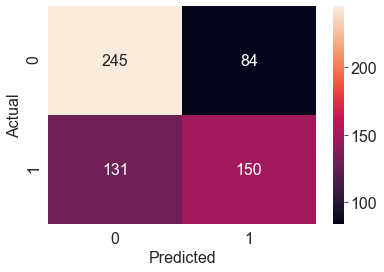

In [271]:
# Heatmap of confussion matrix for Taining prediction of modell3
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Train['Holliday_Package_yes'],model_sk_7_pred_train),annot=True,fmt='.4g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(28.0, 0.5, 'Actual')

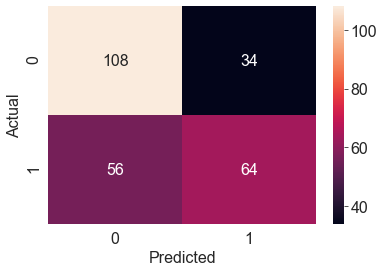

In [272]:
# Heatmap of confussion matrix for Testing data  prediction of modell3
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Test['Holliday_Package_yes'],model_sk_7_pred_test),annot=True,fmt='.4g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [273]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,4

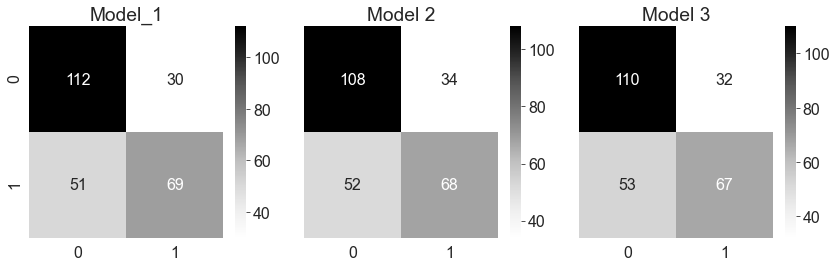

In [274]:
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Holliday_Package_yes'],model_sk_1_pred_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Holliday_Package_yes'],model_sk_2_pred_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Model 2')

plot_2 = sns.heatmap((metrics.confusion_matrix(Test['Holliday_Package_yes'],model_sk_3_pred_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('Model 3');
plt.tight_layout()

### summary statistics of the AUC-ROC curve for all Logistic Regression Models built

In [275]:
from sklearn.metrics import roc_curve,roc_auc_score

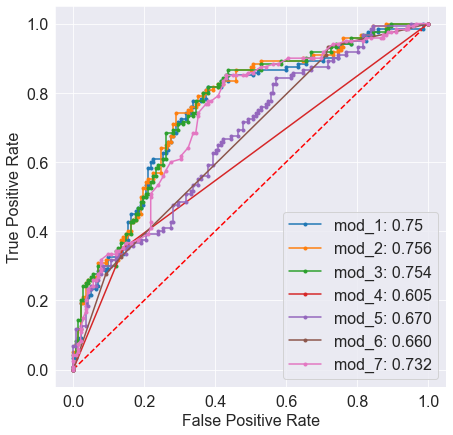

In [276]:
# AUC - ROC of all models on Test data
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line

fpr1, tpr1, thresholds1 = roc_curve(Test['Holliday_Package_yes'], model_sk_1_pred_test_prob) # Model 1
auc = roc_auc_score(Test['Holliday_Package_yes'], model_sk_1_pred_test_prob) # getting AUC for the model
# plot the roc curve for the model
plt.plot(fpr1, tpr1, marker='.', label = 'mod_1: %.2f'% auc)

fpr2, tpr2, thresholds2 = roc_curve(Test['Holliday_Package_yes'], model_sk_2_pred_test_prob) # Model 2
auc = roc_auc_score(Test['Holliday_Package_yes'], model_sk_2_pred_test_prob) # getting AUC for the model
plt.plot(fpr2, tpr2, marker='.', label = 'mod_2: %.3f'% auc)

fpr3, tpr3, thresholds3 = roc_curve(Test['Holliday_Package_yes'], model_sk_3_pred_test_prob) # Model 3
auc = roc_auc_score(Test['Holliday_Package_yes'], model_sk_3_pred_test_prob) # getting AUC for the model
plt.plot(fpr3, tpr3, marker='.', label = 'mod_3: %.3f'% auc)

fpr4, tpr4, thresholds4 = roc_curve(Test['Holliday_Package_yes'], model_sk_4_pred_test_prob) # Model 4
auc = roc_auc_score(Test['Holliday_Package_yes'], model_sk_4_pred_test_prob) # getting AUC for the model
plt.plot(fpr4, tpr4, marker='.', label = 'mod_4: %.3f'% auc)

fpr5, tpr5, thresholds = roc_curve(Test['Holliday_Package_yes'], model_sk_5_pred_test_prob) # Model 5
auc = roc_auc_score(Test['Holliday_Package_yes'], model_sk_5_pred_test_prob) # getting AUC for the model
plt.plot(fpr5, tpr5, marker='.', label = 'mod_5: %.3f'% auc)

fpr6, tpr6, thresholds6 = roc_curve(Test['Holliday_Package_yes'], model_sk_6_pred_test_prob) # Model 6
auc = roc_auc_score(Test['Holliday_Package_yes'], model_sk_6_pred_test_prob) # getting AUC for the model
plt.plot(fpr6, tpr6, marker='.', label = 'mod_6: %.3f'% auc)

fpr7, tpr7, thresholds = roc_curve(Test['Holliday_Package_yes'], model_sk_7_pred_test_prob) # Model 7
auc = roc_auc_score(Test['Holliday_Package_yes'], model_sk_7_pred_test_prob) # getting AUC for the model
plt.plot(fpr7, tpr7, marker='.', label = 'mod_7: %.3f'% auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### ............................. THE END